In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import math

In [2]:
def load_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    # print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        # print(f"name:{name}")
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, task, b = name.strip()[:-5].split('-')
            # algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"algo:{algo}, up:{up}, task:{task}, b:{b}, a:{algorithm}, u:{upper_bound}, t:{task_name}")
            
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(b), kv_data['f(S)'], kv_data['Lambda'], kv_data['AF']) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y, Z, W = list(zip(*res))   # change it to two columns
    return X, Y, Z, W

def load_AF_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    # print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"a:{algo},up:{up},task:{task},b:{b}")
            # print(f"a:{algorithm},up:{upper_bound},task:{task_name},b:{b}")
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(b), kv_data['AF']) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y = list(zip(*res))   # change it to two columns
    return X, Y


def load_time_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    # print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        # print(f"name:{name}")
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, task, b = name.strip()[:-5].split('-')
            # algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"algo:{algo}, up:{up}, task:{task}, b:{b}, a:{algorithm}, u:{upper_bound}, t:{task_name}")
            
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(b), kv_data['f(S)'], kv_data['Lambda'], kv_data['Time']) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y, Z, W = list(zip(*res))   # change it to two columns
    return X, Y, Z, W

def load_matroid_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str, target: str = 'AF'):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    # print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, seed, task = name.strip()[:-5].split('-')
            # algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"algo:{algo}, up:{up}, task:{task}, b:{b}, a:{algorithm}, u:{upper_bound}, t:{task_name}")
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(seed), kv_data['f(S)'], kv_data['upb'], kv_data[target]) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y, Z, W = list(zip(*res))   # change it to two columns
    return X, Y, Z, W

def load_parameter_series(algorithm: str, upper_bound: str, task_name: str, root_dir: str, parameter: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    res = []
    print(f"r:{root_dir}")
    for name in os.listdir(root_dir):
        if not os.path.isdir(os.path.join(root_dir, name)):
            algo, up, task, b = name.strip()[:-5].split('-')
            # print(f"a:{algo},up:{up},task:{task},b:{b}")
            # print(f"a:{algorithm},up:{upper_bound},task:{task_name},b:{b}")
            if algo == algorithm and up == upper_bound and task == task_name:
                # print(name)
                file_path = os.path.join(root_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(b), kv_data['parameters'][parameter]) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y = list(zip(*res))   # change it to two columns
    return X, Y



progress:1/200
progress:2/200
progress:3/200
progress:4/200
progress:5/200
progress:6/200
progress:7/200
progress:8/200
progress:9/200
progress:10/200
progress:11/200
progress:12/200
progress:13/200
progress:14/200
progress:15/200
progress:16/200
progress:17/200
progress:18/200
progress:19/200
progress:20/200
progress:21/200
progress:22/200
progress:23/200
progress:24/200
progress:25/200
progress:26/200
progress:27/200
progress:28/200
progress:29/200
progress:30/200
progress:31/200
progress:32/200
progress:33/200
progress:34/200
progress:35/200
progress:36/200
progress:37/200
progress:38/200
progress:39/200
progress:40/200
progress:41/200
progress:42/200
progress:43/200
progress:44/200
progress:45/200
progress:46/200
progress:47/200
progress:48/200
progress:49/200
progress:50/200
progress:51/200
progress:52/200
progress:53/200
progress:54/200
progress:55/200
progress:56/200
progress:57/200
progress:58/200
progress:59/200
progress:60/200
progress:61/200
progress:62/200
progress:63/200
p

findfont: Font family 'normal' not found.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
fin

progress:200/200
0:0.8993709822694574,1:0.9588906486802141,2:0.909506377877295,3:0.9567113259104686


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

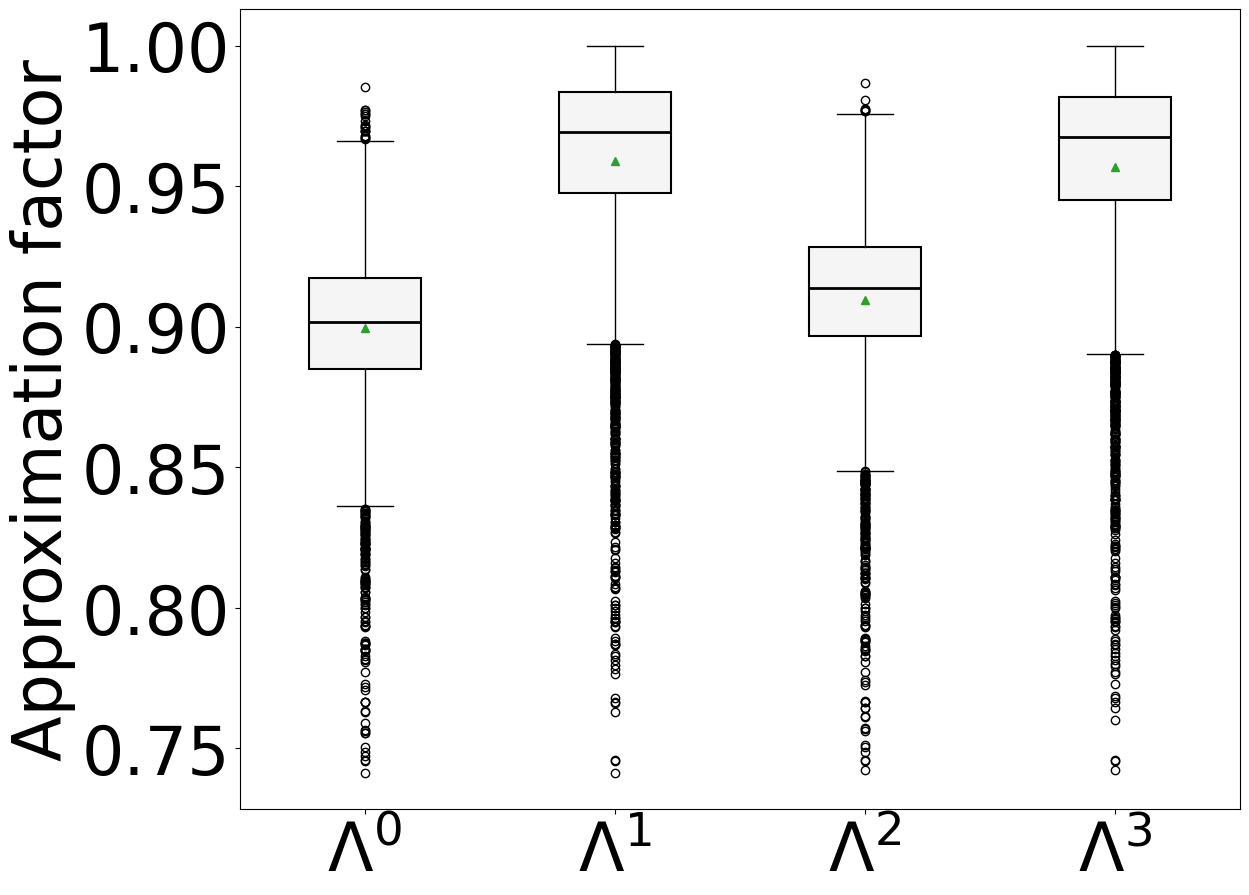

In [9]:
upper_bounds = ["ub1", "ub7", "ub7m"]
algos = ["greedy_max"]
# task_name = "FacebookGraphCoverage"
task_name = "CalTechMaximization"
# task_name = "AdultIncomeFeatureSelection"
# task_name = "YoutubeCoverage"

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

n = 100

sample = 100
suffix = f""

task2title = {
    "FacebookGraphCoverage":"ego-facebook Converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

n_list = []
algo = "modified_greedy" 

ub_list = [
    "ub1",
    "ub1m",
    "ub7",
    "ub7m"
]
ub_title_dict = {
    "ub1": r"$\Lambda^0$",
    "ub1m": r"$\Lambda^1$",
    "ub7": r"$\Lambda^2$",
    "ub7m":r"$\Lambda^3$",
}
ub_title_list = [ ub_title_dict[ub] for ub in ub_list]
colors = [
    "darkblue","mediumblue","blue","stateblue"
]
ub_mean_list = []
for ub in ub_list:
    ub_mean_list.append([])

seed_range = range(0, 200)

budget_range = list(range(6, 31))

for seed in seed_range:
    root_dir = os.path.join("../result/archive-5", path_dict[task_name] + suffix, f"{n}",f"{seed}")
    
    for i in range(0, len(ub_list)):
        ub = ub_list[i]
        X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
        for idx in range(0, len(X)):
            b = X[idx]
            af = W[idx]
            if b in budget_range:
                ub_mean_list[i].append(af)

    print(f"progress:{seed + 1}/{200}")
    
print(f"0:{np.mean(ub_mean_list[0])},1:{np.mean(ub_mean_list[1])},2:{np.mean(ub_mean_list[2])},3:{np.mean(ub_mean_list[3])}")

data = ub_mean_list

fs = 48
plt.rcParams["font.size"] = fs
font = {'family' : 'normal',
        'size'   : fs}

plt.rc('font', **font)

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Approximation factor")
# ax.set_ylabel("Computational time (s)")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)

bp = ax.boxplot(data, patch_artist=True, showfliers=True, tick_labels=ub_title_list, showmeans=True, boxprops=box_props, medianprops=median_props)

plt.xticks(fontsize=fs)


for median in bp["medians"]:
    median.set_color("black")

for box in bp["boxes"]:
    box.set_facecolor("whitesmoke")

plt.savefig('plot.pdf', format='pdf', bbox_inches='tight')

plt.show()

seed:0, bd:6
seed:0, bd:7
seed:0, bd:8
seed:0, bd:9
seed:0, bd:10
seed:0, bd:11
seed:0, bd:12
seed:0, bd:13
seed:0, bd:14
seed:0, bd:15
seed:0, bd:16
seed:0, bd:17
seed:0, bd:18
seed:0, bd:19
seed:0, bd:20
seed:0, bd:21
seed:0, bd:22
seed:0, bd:23
seed:0, bd:24
seed:0, bd:25
seed:0, bd:26
seed:0, bd:27
seed:0, bd:28
seed:0, bd:29
seed:0, bd:30
seed:0, bd:31
seed:0, bd:32
seed:0, bd:33
seed:0, bd:34
seed:0, bd:35
seed:0, bd:36
seed:0, bd:37
seed:0, bd:38
seed:0, bd:39
progress:1/200
seed:1, bd:6
seed:1, bd:7
seed:1, bd:8
seed:1, bd:9
seed:1, bd:10
seed:1, bd:11
seed:1, bd:12
seed:1, bd:13
seed:1, bd:14
seed:1, bd:15
seed:1, bd:16
seed:1, bd:17
seed:1, bd:18
seed:1, bd:19
seed:1, bd:20
seed:1, bd:21
seed:1, bd:22
seed:1, bd:23
seed:1, bd:24
seed:1, bd:25
seed:1, bd:26
seed:1, bd:27
seed:1, bd:28
seed:1, bd:29
seed:1, bd:30
seed:1, bd:31
seed:1, bd:32
seed:1, bd:33
seed:1, bd:34
seed:1, bd:35
seed:1, bd:36
seed:1, bd:37
seed:1, bd:38
seed:1, bd:39
progress:2/200
seed:2, bd:6
seed:2, bd:7


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

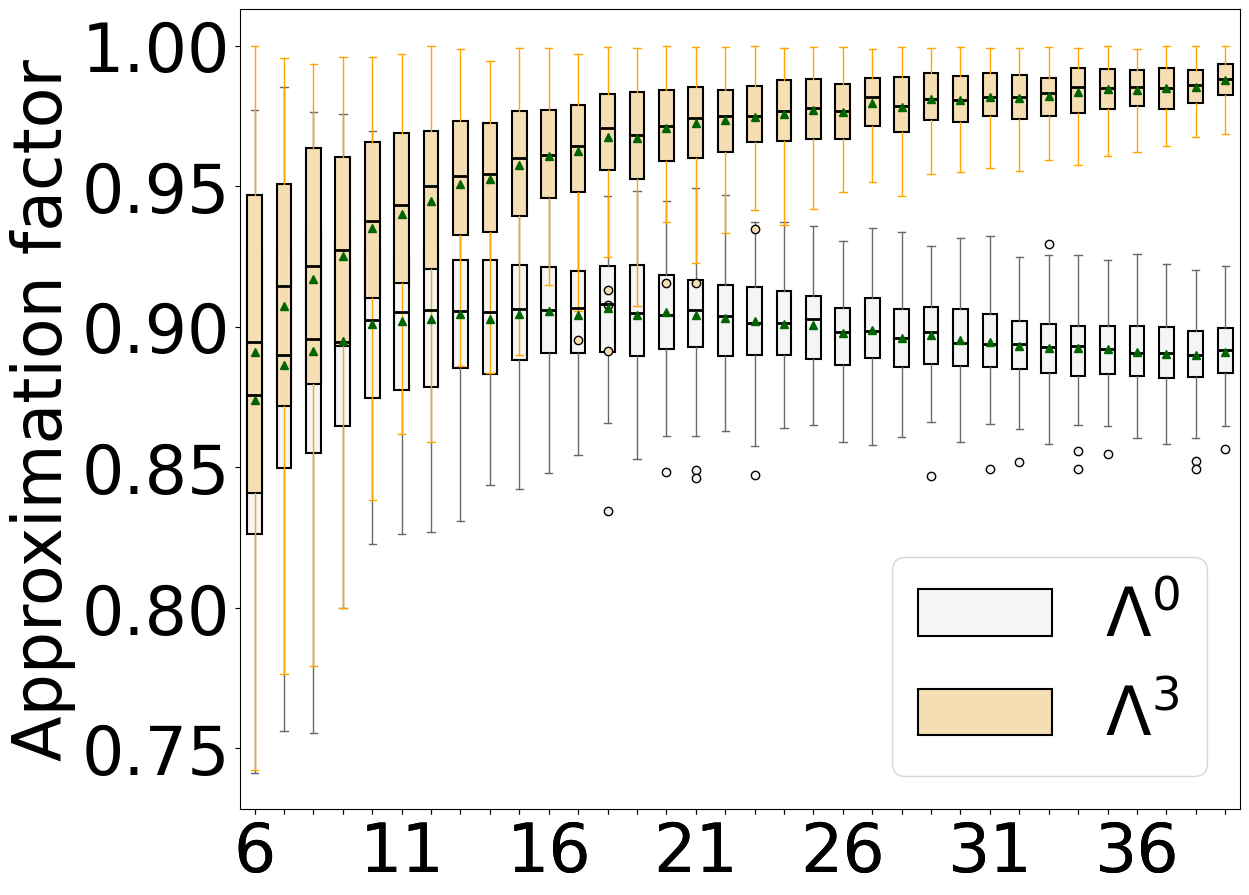

In [16]:
upper_bounds = ["ub1", "ub7m"]
algos = ["greedy_max"]
# task_name = "FacebookGraphCoverage"
task_name = "CalTechMaximization"
# task_name = "AdultIncomeFeatureSelection"
# task_name = "YoutubeCoverage"

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

fs = 48

font = {'family' : 'normal',
        'size'   : fs}

plt.rc('font', **font)

n = 100
start_b = 6
stop_b = 40

sample = 100
suffix = f""

task2title = {
    "FacebookGraphCoverage":"ego-facebook Converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

n_list = []
algo = "modified_greedy" 

ub_list = [
    "ub1",
    "ub1m",
    "ub7",
    "ub7m"
]

ub_title_dict = {
    "ub1": "Upper bound 0",
    "ub1m": "Upper bound 1",
    "ub7": "Upper bound 2",
    "ub7m":"Upper bound 3",
}

budget_list = list(range(start_b, stop_b, 1))
budget_mean_list = []
for bd in budget_list:
    budget_mean_list.append([])

budget_title_list = [f"{bd}" for bd in budget_list]

colors = [
    "darkblue","mediumblue","blue","stateblue"
]
ub_mean_list = []
for ub in ub_list:
    ub_mean_list.append([])

seed_range = range(0, 200)

ubs_to_draw_list = [0, 3]

data_list = []

for ub_to_draw in ubs_to_draw_list:
    for seed in seed_range:
        root_dir = os.path.join("../result/archive-5", path_dict[task_name] + suffix, f"{n}",f"{seed}")
        
        # for i in range(0, len(ub_list)):
        ub = ub_list[ub_to_draw]
        X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
        W_dict = {}
        for i in range(0, len(X)):
            budget = int(X[i])
            W_dict[budget] = W[i]

        for bd in budget_list:
            # print(f"bd:{bd}, W_dict:{W_dict.keys()}")
            print(f"seed:{seed}, bd:{bd}")
            budget_mean_list[bd - start_b].append(W_dict[bd])

        print(f"progress:{seed + 1}/{200}")
    data_list.append(budget_mean_list)
    budget_mean_list = []
    for bd in budget_list:
        budget_mean_list.append([])
    

# data = budget_mean_list

plt.rcParams["font.size"] = fs

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Approximation factor")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)
mean_props = {"marker":"^","markerfacecolor":"darkgreen", "markeredgecolor":"darkgreen"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
whisker_props = {"color":"black"}

color_list = ["whitesmoke","wheat"]

whisker_color_list = ["dimgray","orange"]

ub_label_dict = {
    "ub0":r"$\Lambda^0$",
    "ub1":r"$\Lambda^3$"
}

for i in range(0, len(data_list)):
    data = data_list[i]

    flier_props["markerfacecolor"] = color_list[i]
    whisker_props["color"] = whisker_color_list[i]

    # xtick_labels = list(range(start_b, stop_b * 2 - start_b + 1, 2))

    xtick_labels = []
    for budget in budget_title_list:
        if int(budget) % 5 == 1:
            xtick_labels.append(budget)
        else:
            xtick_labels.append(" ")

    bp = ax.boxplot(data,label=ub_label_dict[f"ub{i}"], patch_artist=True, tick_labels = xtick_labels, showmeans=True, boxprops=box_props, medianprops=median_props
                    , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)

    # xticks = []
    # for idx in range(0, len(budget_title_list), 2):
    #     xticks.append(idx)

    # # plt.xticks(xticks)
    # current_ticks = plt.xticks()[0]
    # plt.xticks(current_ticks, [f'{tick + start_b - 1}' if int(tick) % 2 == 1 else tick for tick in current_ticks])  # Hide ticks at 2, 4, 6

    for median in bp["medians"]:
        median.set_color("black")
    for box in bp["boxes"]:
        box.set_facecolor(color_list[i])

plt.legend()


plt.savefig(f'./result_extended_budgets/{task_name}.pdf', format="pdf", bbox_inches='tight')

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

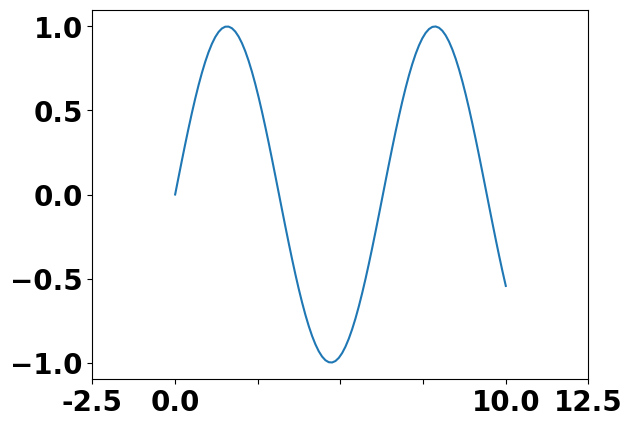

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y)
current_ticks = plt.xticks()[0]
plt.xticks(current_ticks, ['' if tick in [2.5, 5.0, 7.5] else tick for tick in current_ticks])  # Hide ticks at 2, 4, 6
plt.show()


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:1/20 facebook_500.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:2/20 facebook_500_T.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:3/20 facebook_1000.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:4/20 facebook_1000_T.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:5/20 facebook_b.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:6/20 caltech_50.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:7/20 caltech_50_T.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:8/20 caltech_100.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:9/20 caltech_100_T.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:10/20 caltech_b.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:11/20 adult_50.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:12/20 adult_50_T.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:13/20 adult_100.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:14/20 adult_100_T.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:15/20 adult_b.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:16/20 youtube_500.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:17/20 youtube_500_T.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:18/20 youtube_1000.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:19/20 youtube_1000_T.pdf completed.


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

count:20/20 youtube_b.pdf completed.


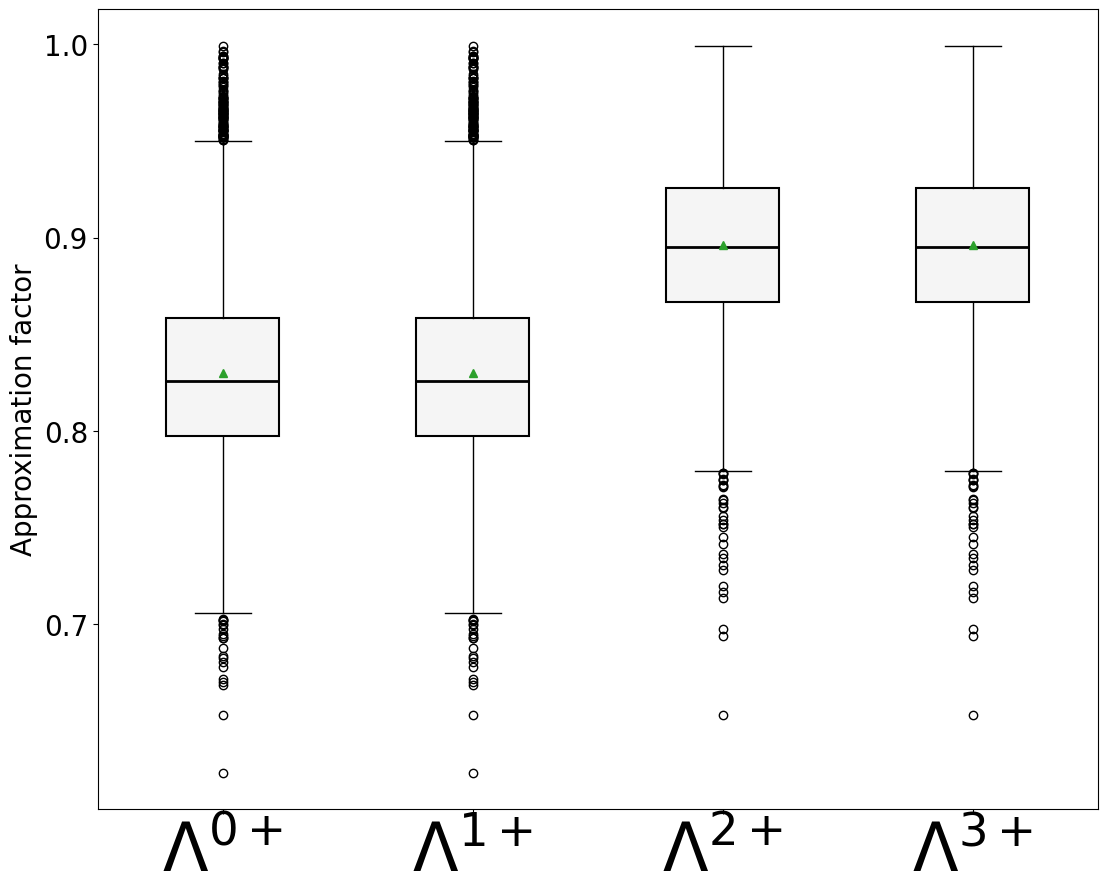

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


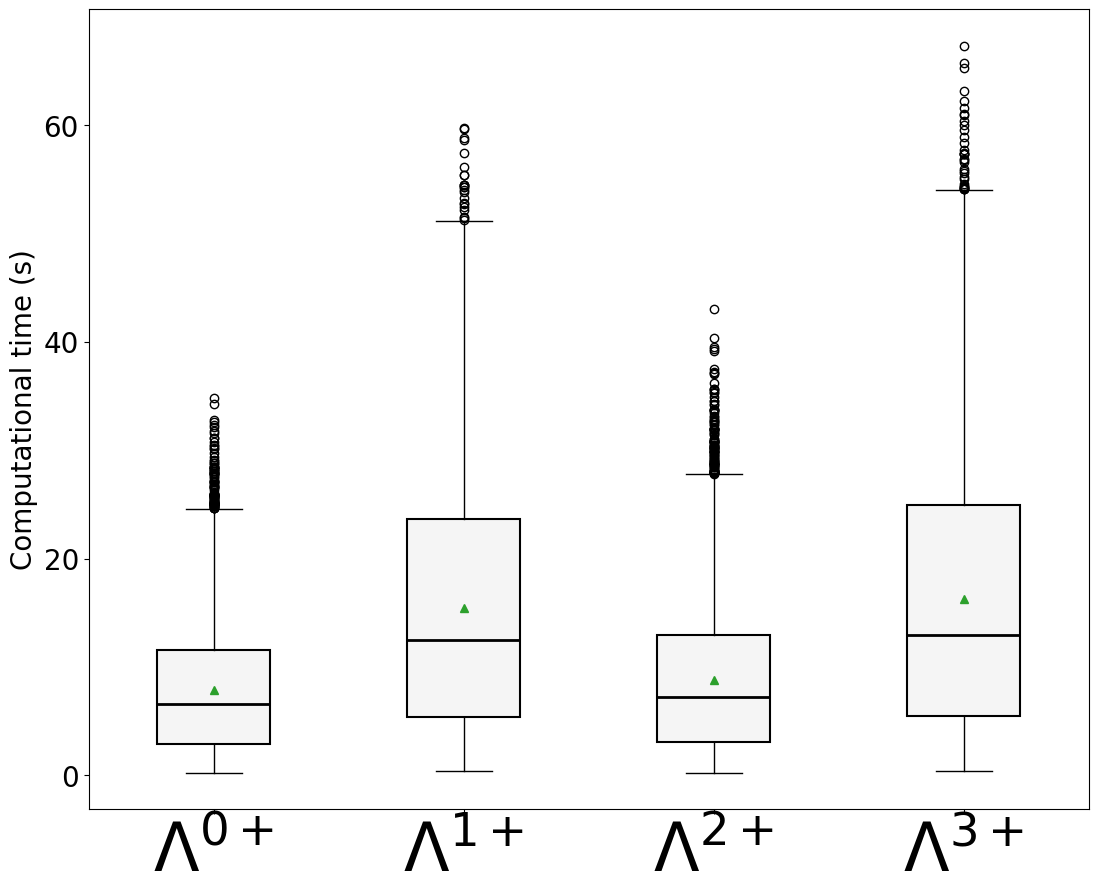

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


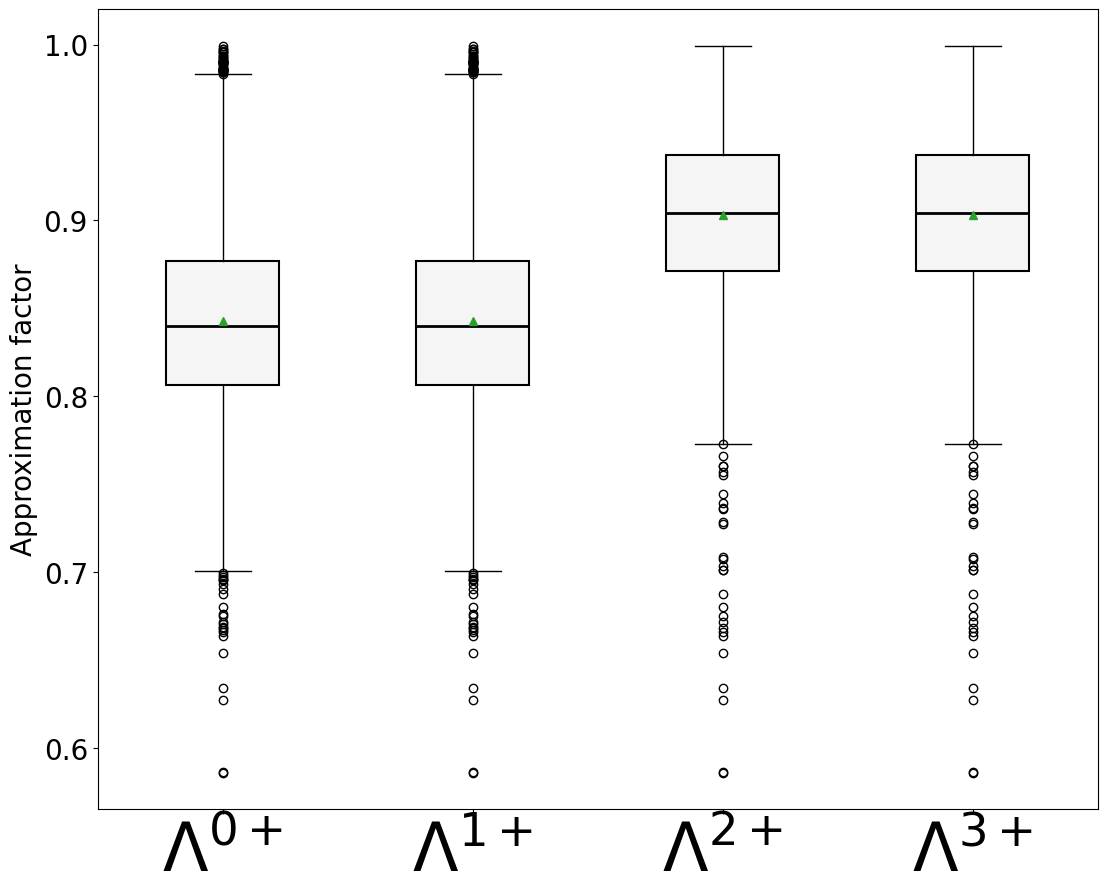

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


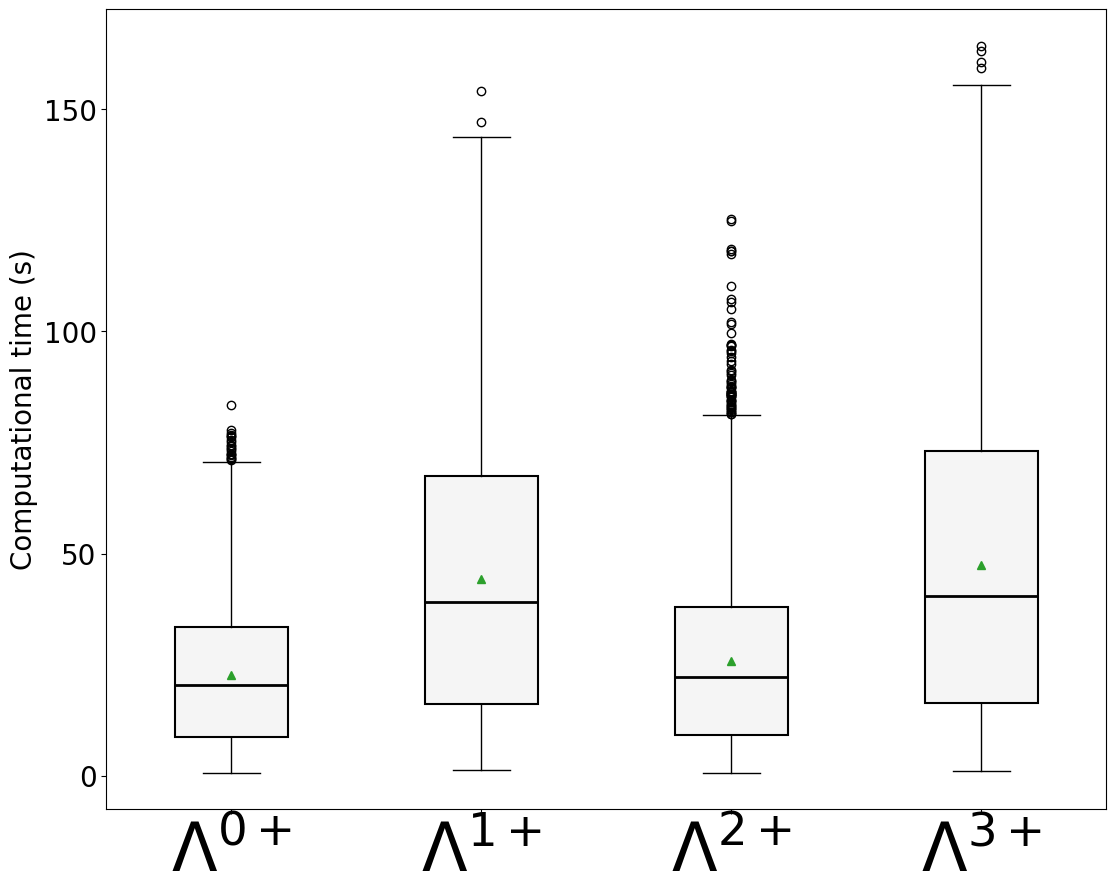

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

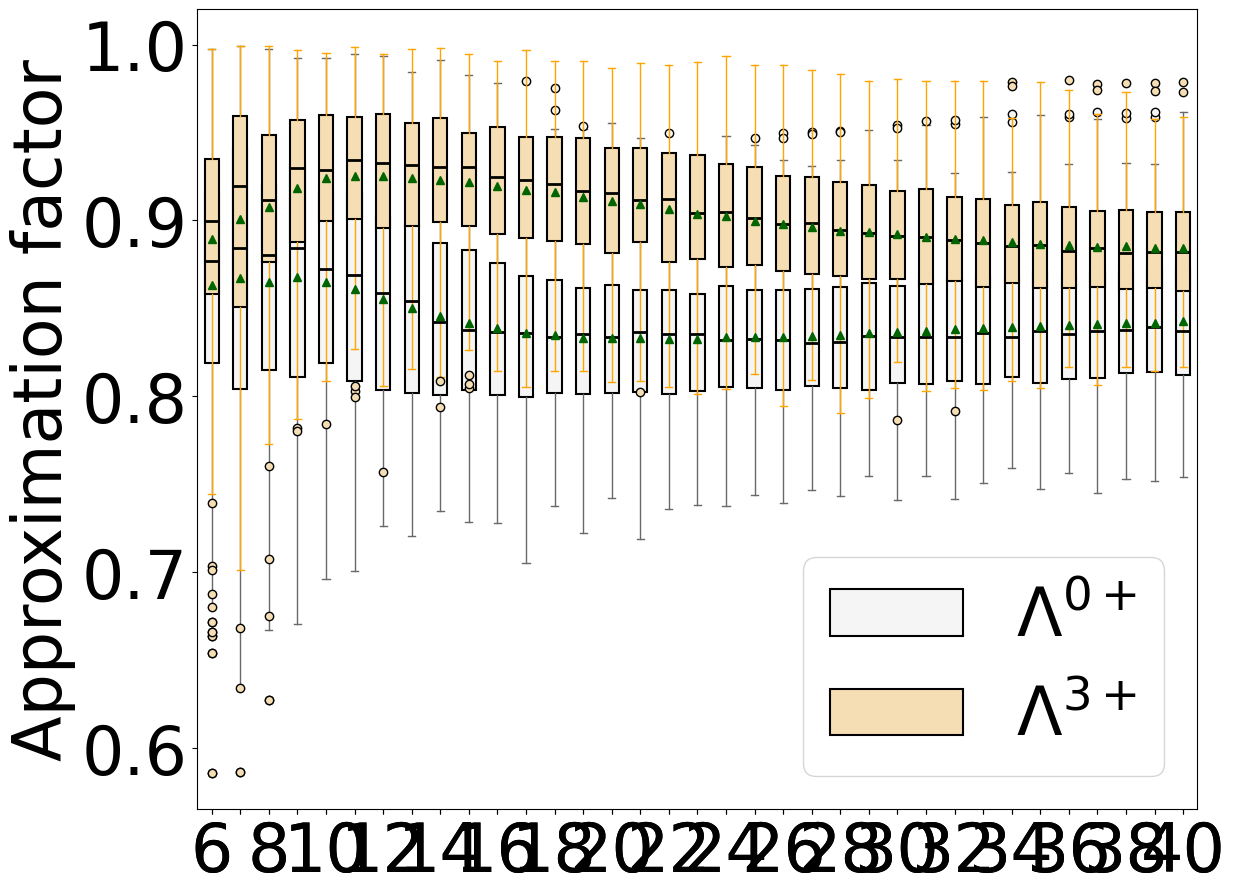

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


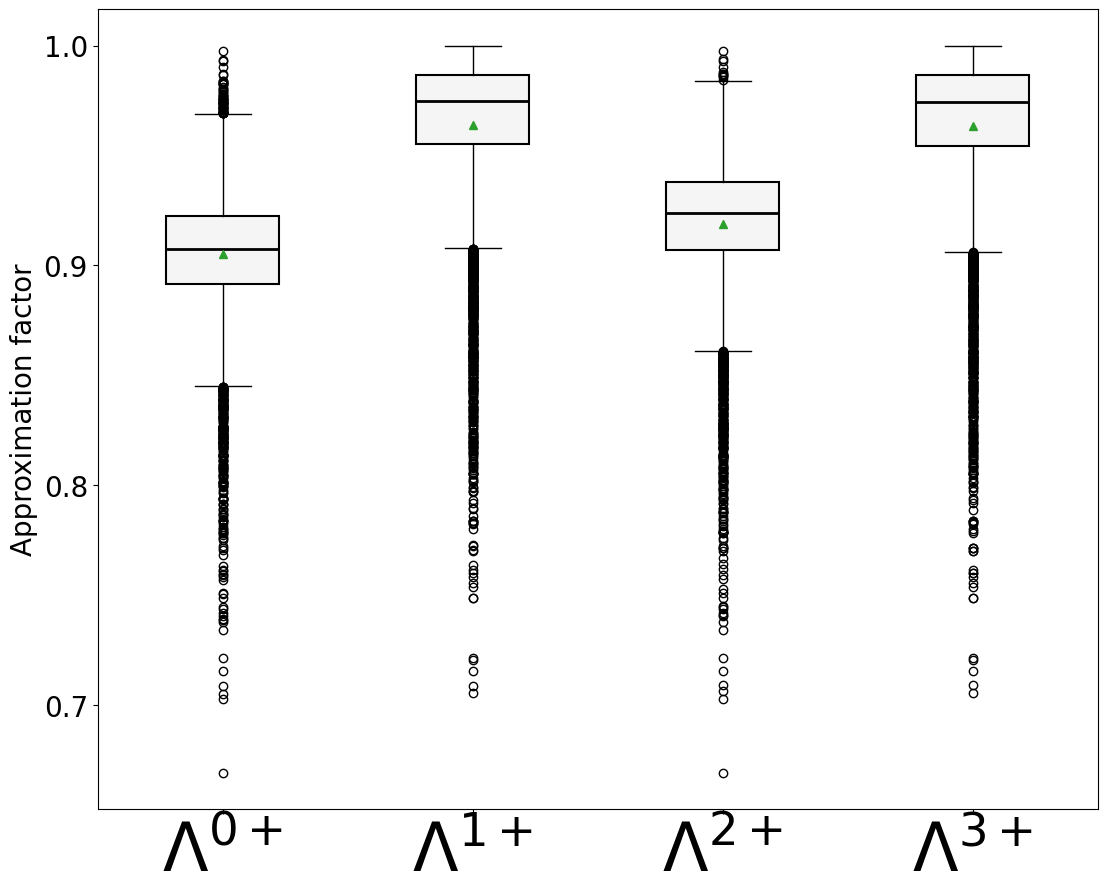

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


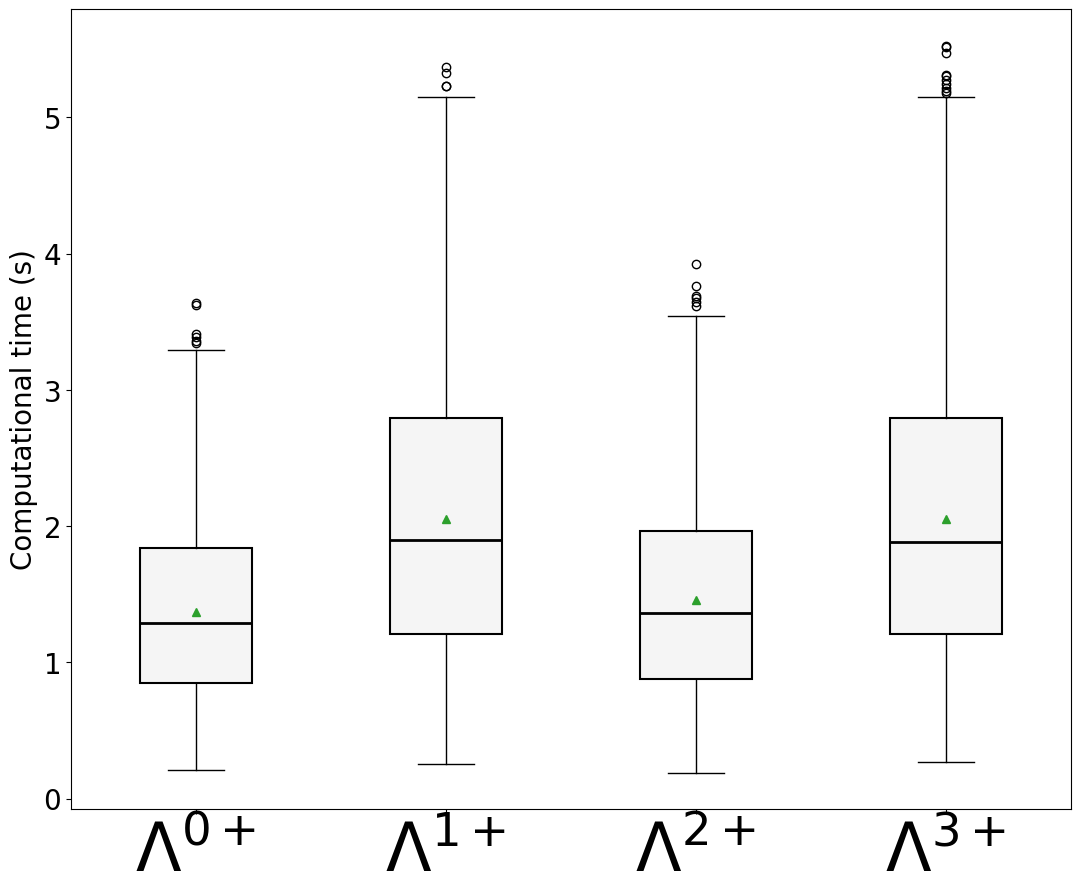

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


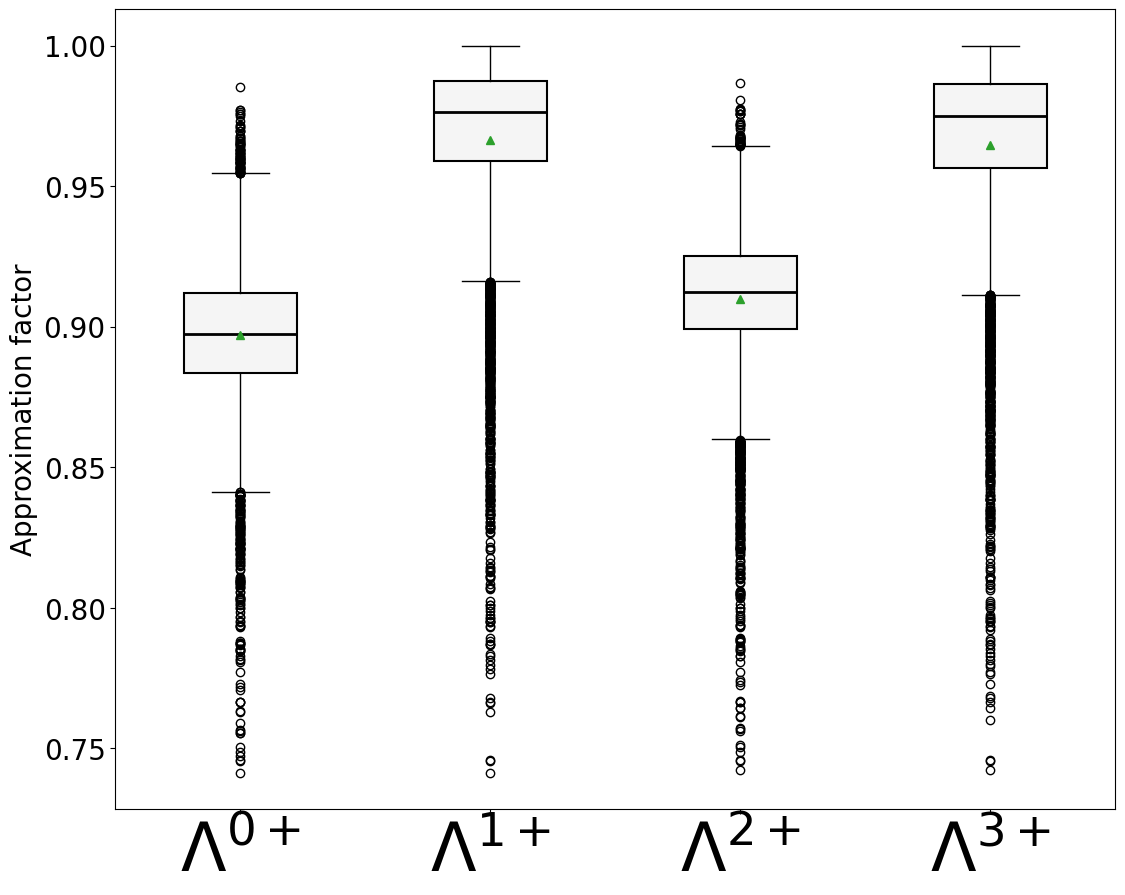

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


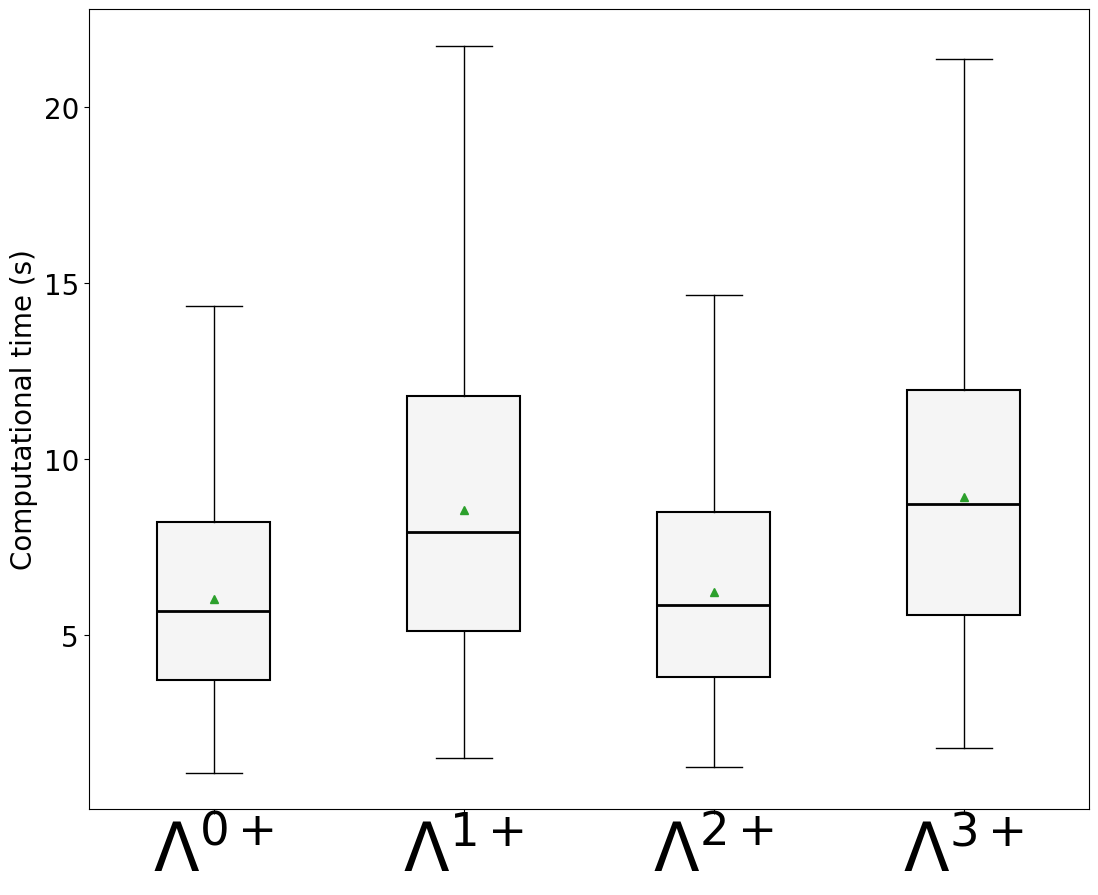

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

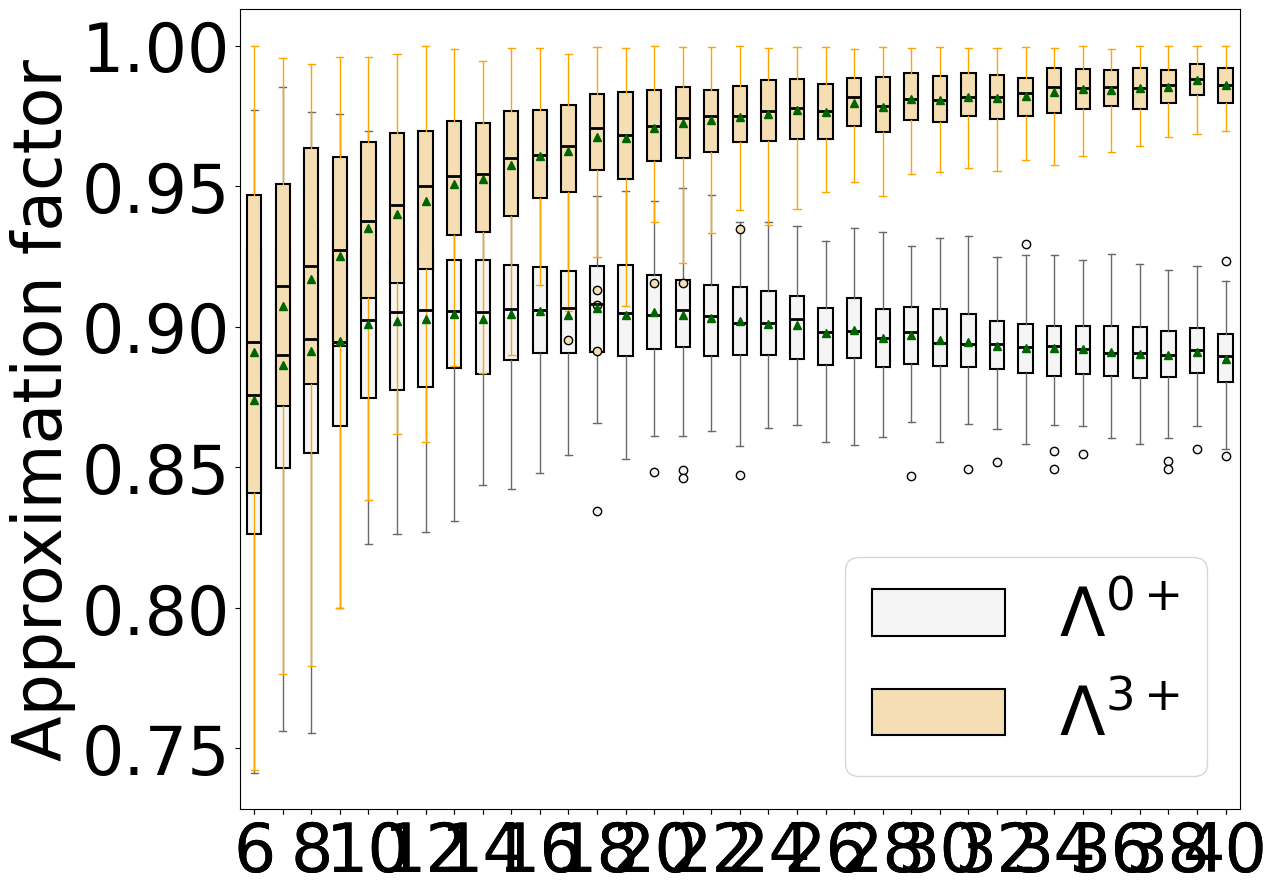

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


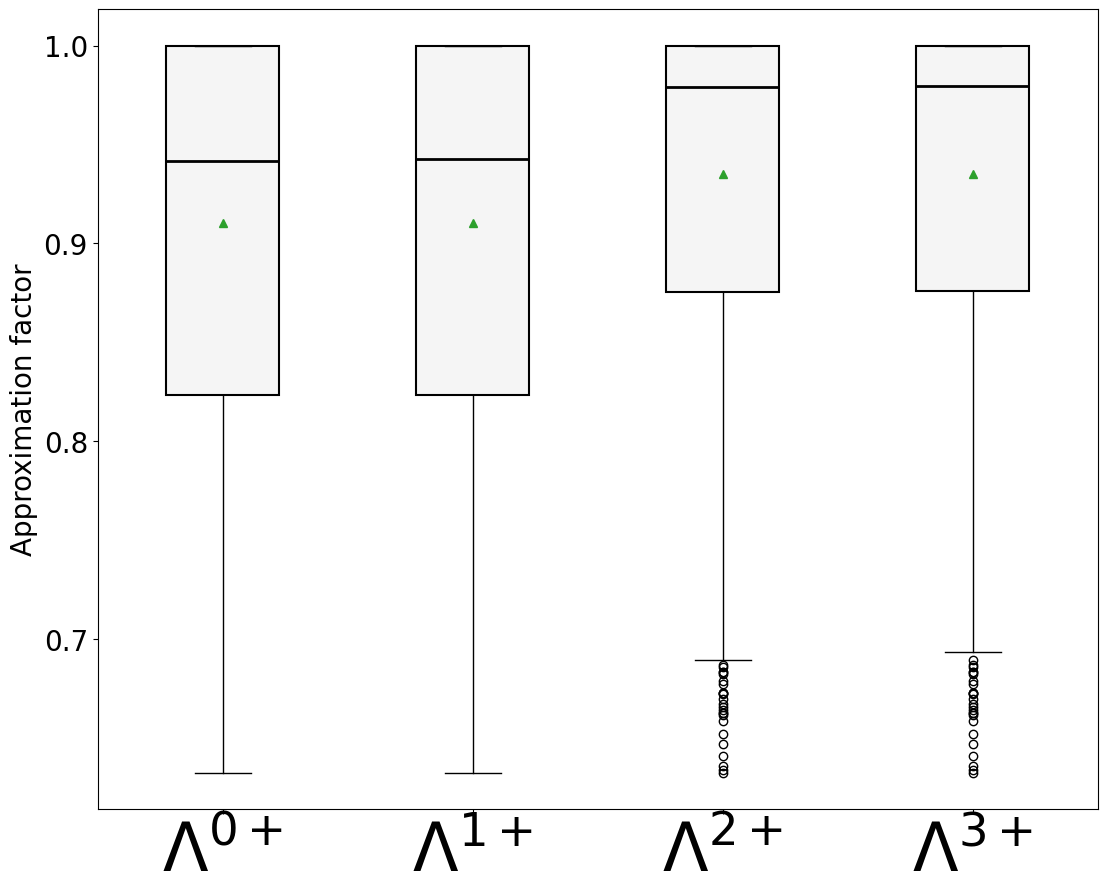

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


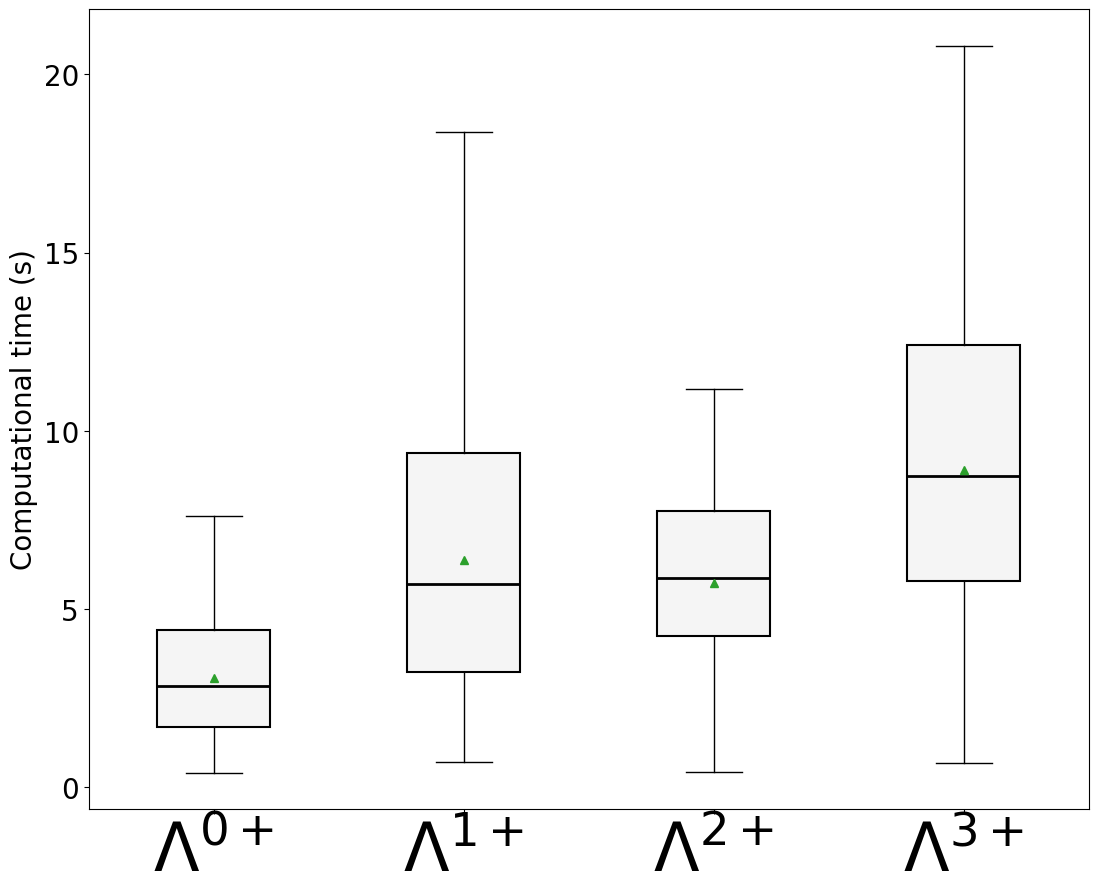

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


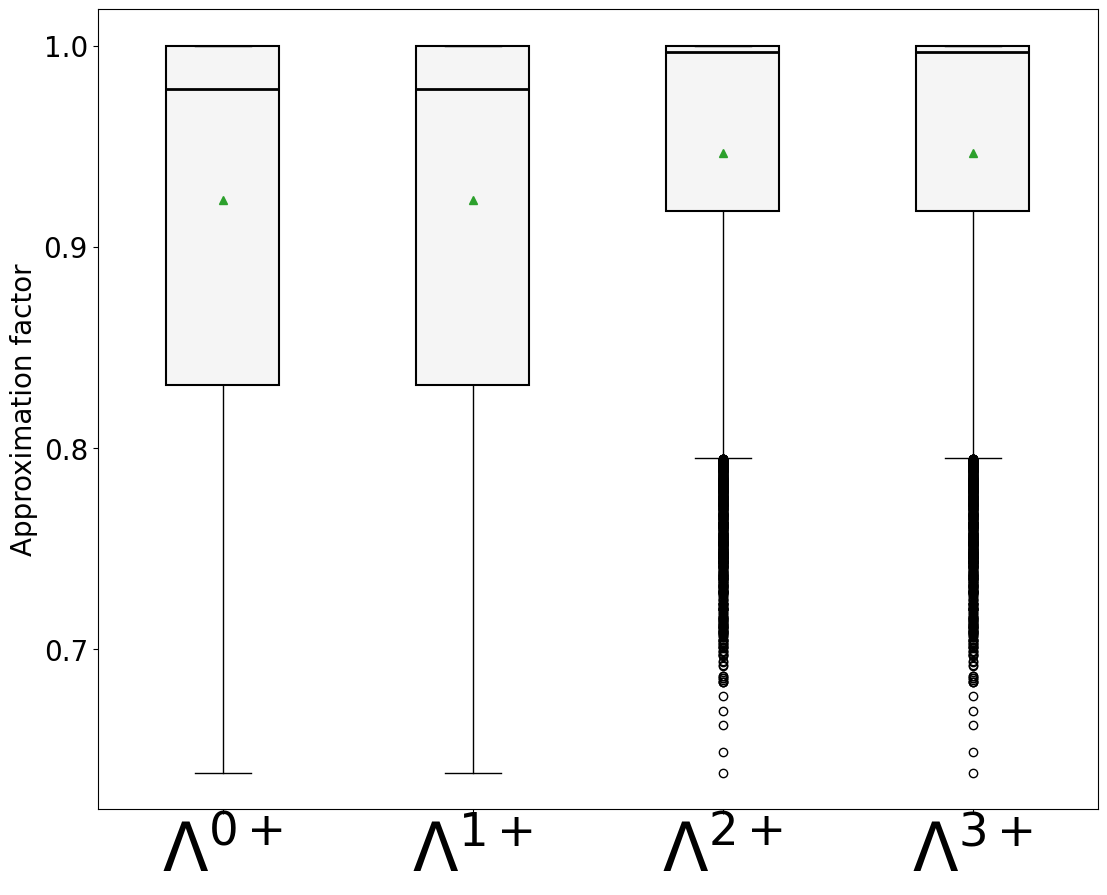

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


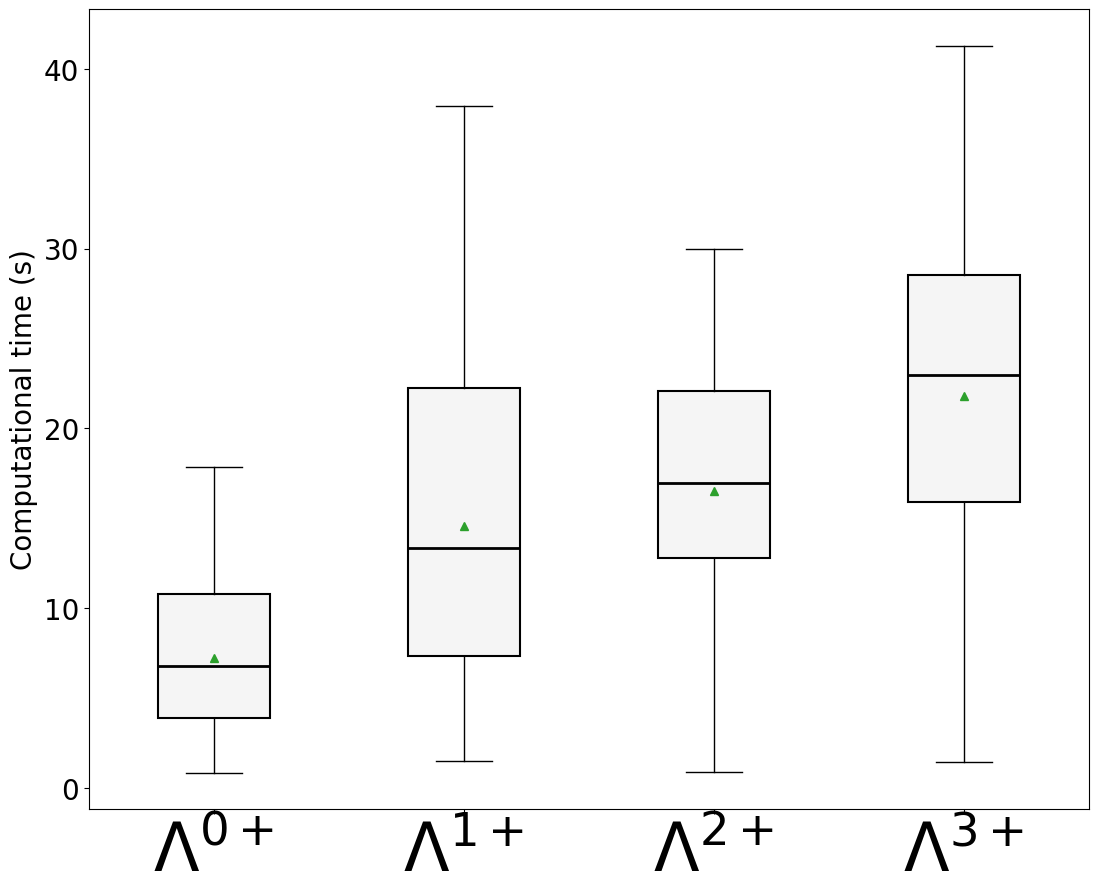

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

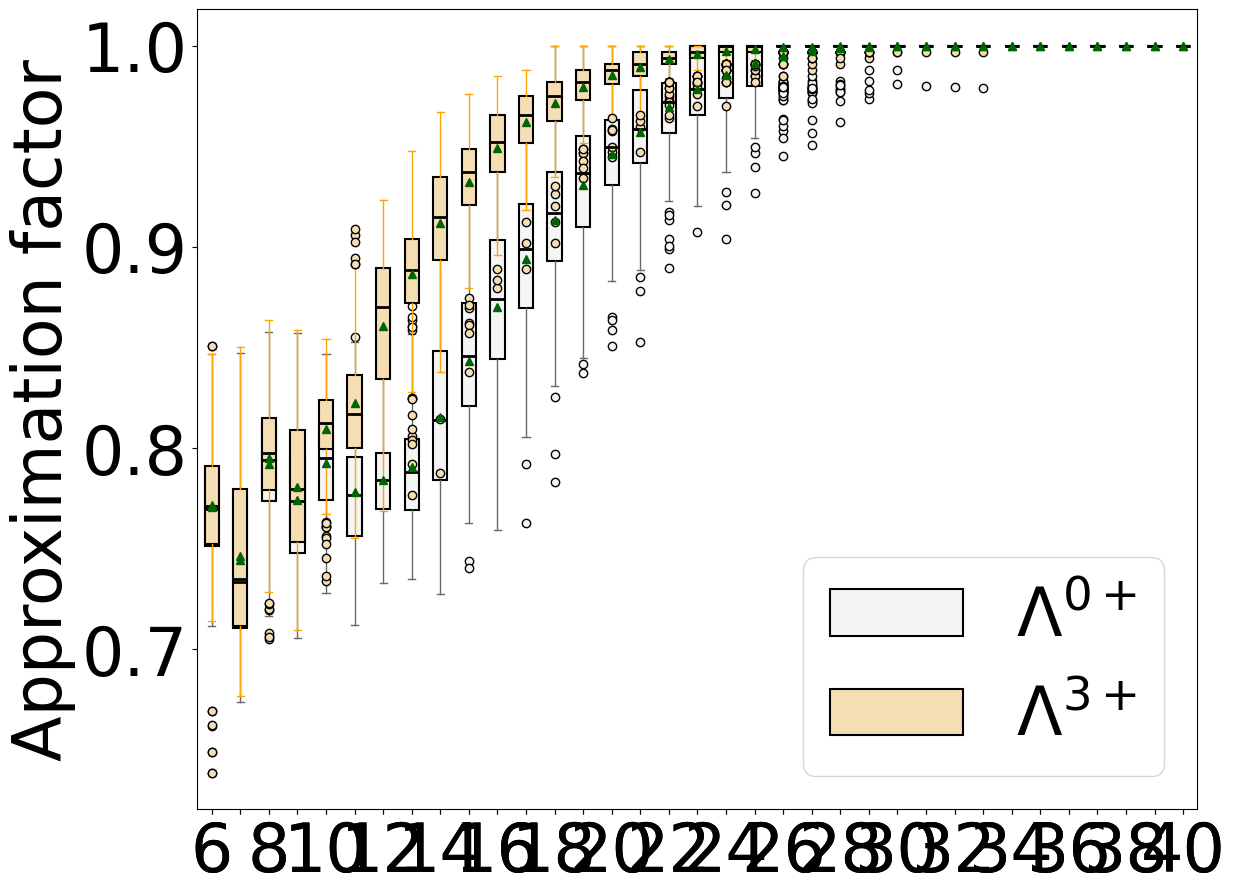

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


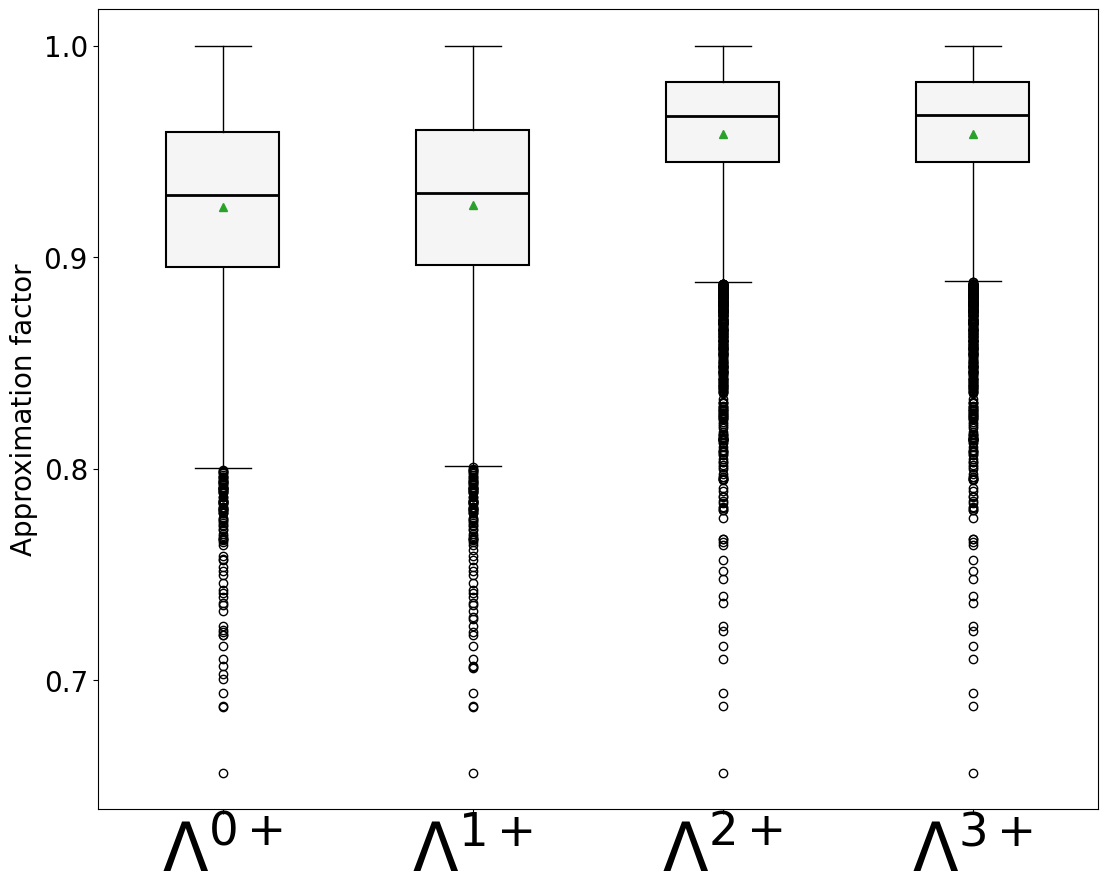

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


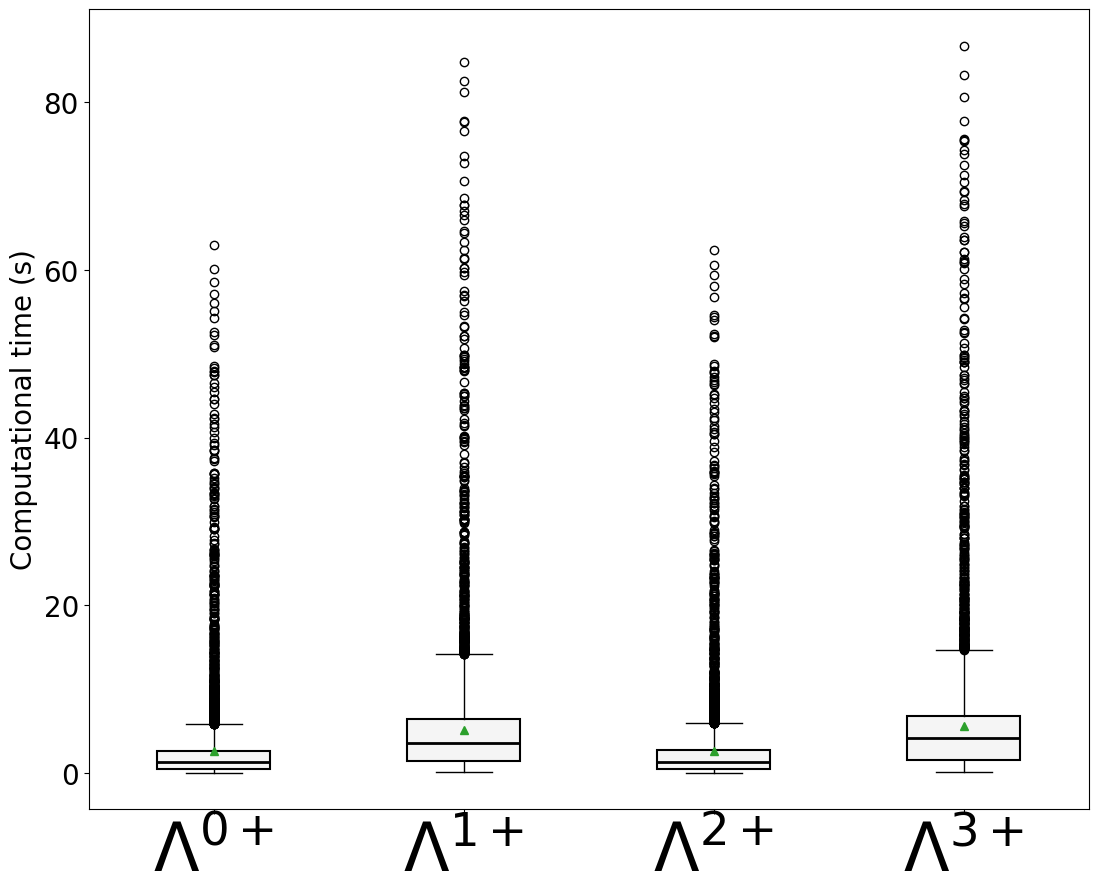

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


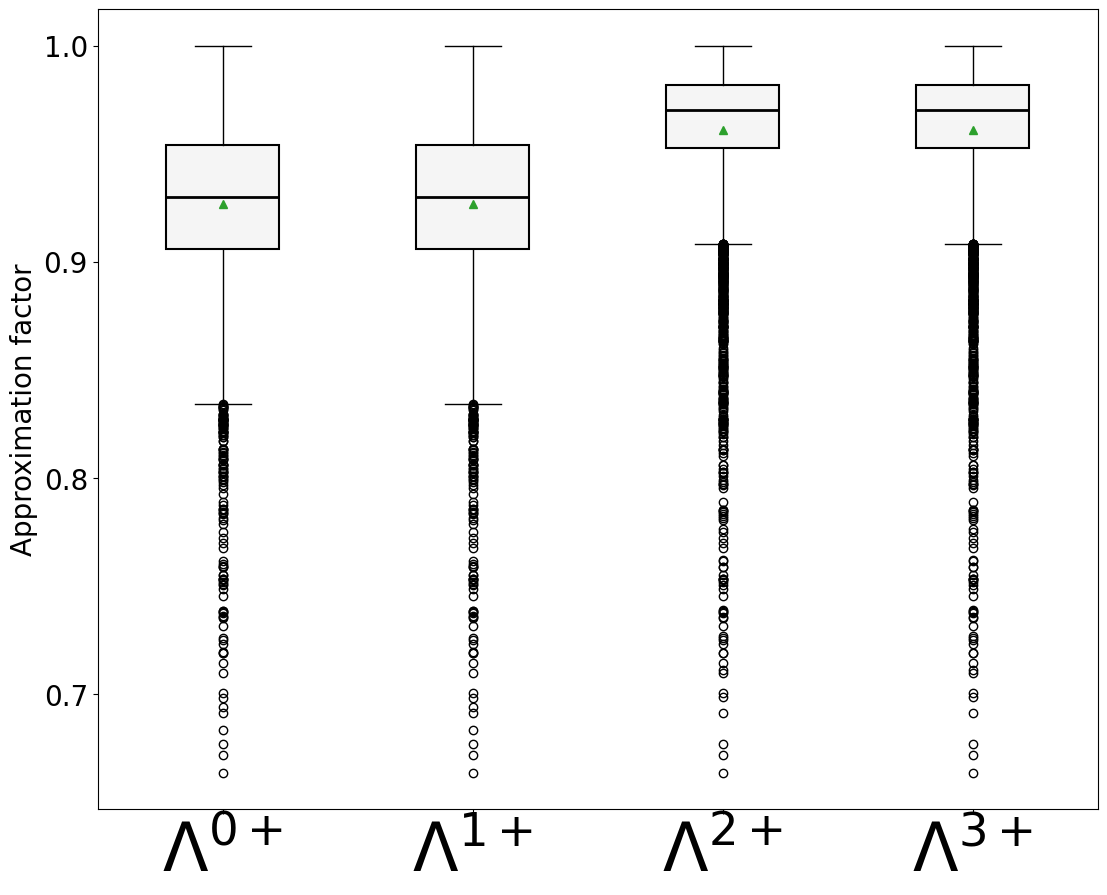

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.


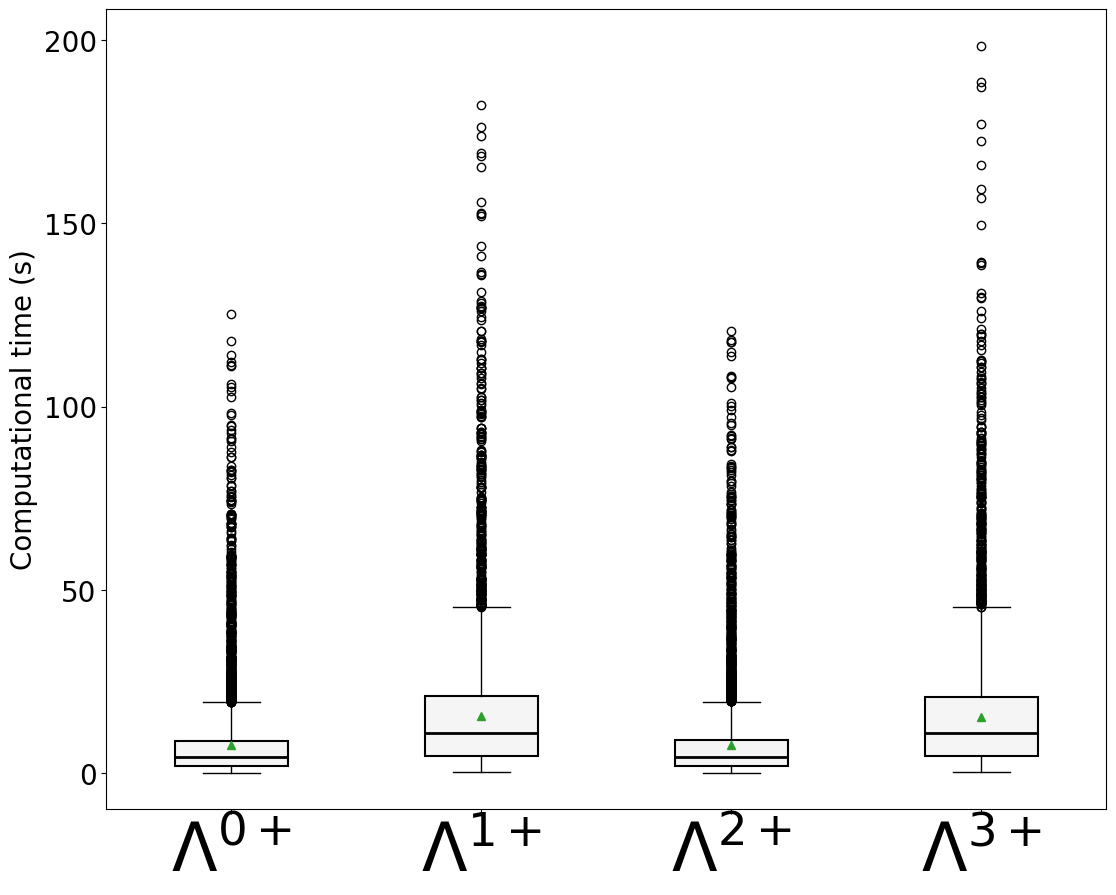

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

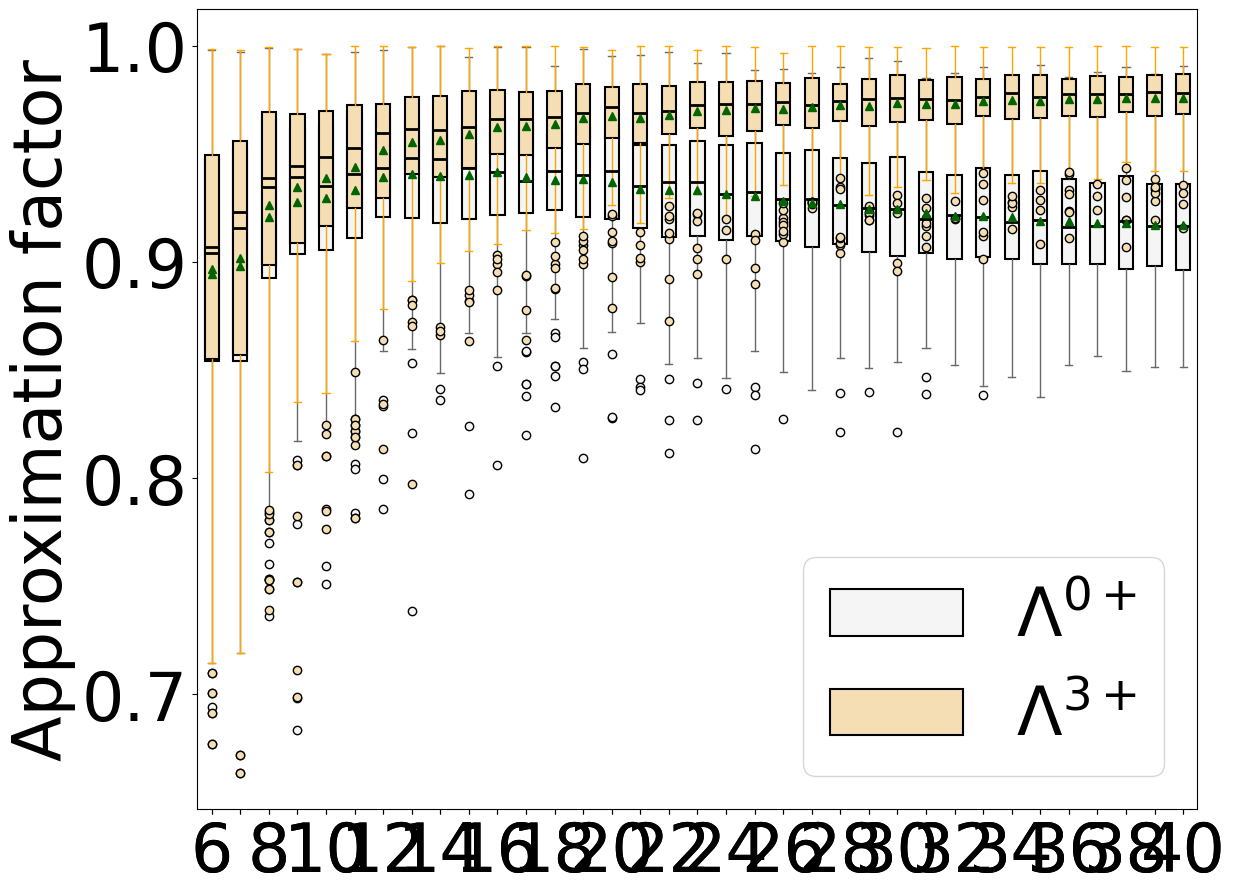

In [17]:
upper_bounds = ["ub1", "ub1m", "ub7", "ub7m"]
algos = ["modified_greedy"]

fs = 48

font = {'family' : 'normal',
        'size'   : fs}

plt.rc('font', **font)

tasks = [
    "FacebookGraphCoverage",
    "CalTechMaximization",
    "AdultIncomeFeatureSelection",
    "YoutubeCoverage"
]

shortcut_dict = {
    "FacebookGraphCoverage":"facebook",
    "CalTechMaximization":"caltech",
    "AdultIncomeFeatureSelection":"adult",
    "YoutubeCoverage":"youtube"
}

sizes = [
    "small",
    "large"
]
sizes_dict = {
    "small":{
        "FacebookGraphCoverage":500,
        "CalTechMaximization":50,
        "AdultIncomeFeatureSelection" : 50,
        "YoutubeCoverage": 500
    },
    "large":{
        "FacebookGraphCoverage":1000,
        "CalTechMaximization":100,
        "AdultIncomeFeatureSelection" : 100,
        "YoutubeCoverage": 1000
    },
}

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

task2title = {
    "FacebookGraphCoverage":"ego-facebook converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

cal_time = [
    False,
    True
]

output_folder = "./result_fomt"
archive_dir = "../result/archive-5"
b_size = "large"

count = 0

for task_name in tasks:
    for size in sizes:
        for t in cal_time:
            n = sizes_dict[size][task_name]

            sample = 100
            suffix = f""

            n_list = []
            algo = "modified_greedy" 

            ub_list = [
                "ub1",
                "ub1m",
                "ub7",
                "ub7m"
            ]
            ub_title_dict = {
                "ub1": r"$\Lambda^{0+}$",
                "ub1m": r"$\Lambda^{1+}$",
                "ub7": r"$\Lambda^{2+}$",
                "ub7m":r"$\Lambda^{3+}$",
            }
            ub_title_list = [ ub_title_dict[ub] for ub in ub_list]
            colors = [
                "darkblue","mediumblue","blue","stateblue"
            ]
            ub_mean_list = []
            for ub in ub_list:
                ub_mean_list.append([])

            seed_range = range(0, 200)

            budget_range = list(range(6, 41))

            for seed in seed_range:
                root_dir = os.path.join(archive_dir, path_dict[task_name] + suffix, f"{n}",f"{seed}")
                
                for i in range(0, len(ub_list)):
                    ub = ub_list[i]
                    if t:
                        X, Y, Z, W = load_time_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
                    else:
                        # print(f"t:{ub},t:{task_name},r:{root_dir}")
                        X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
                    for idx in range(0, len(X)):
                        b = X[idx]
                        af = W[idx]
                        if b in budget_range:
                            ub_mean_list[i].append(af)
                
            data = ub_mean_list

            plt.rcParams["font.size"] = fs

            fig = plt.figure(figsize=(10, 8))

            ax = fig.add_axes([0,0,1,1])
            if t:
                ax.set_ylabel("Computational time (s)")
            else:
                ax.set_ylabel("Approximation factor")

            box_props = dict(linewidth=1.5, color="black")
            median_props = dict(linewidth=2)

            bp = ax.boxplot(data, patch_artist=True, showfliers=True, tick_labels=ub_title_list, showmeans=True, boxprops=box_props, medianprops=median_props)

            plt.xticks(fontsize=48) 

            for median in bp["medians"]:
                median.set_color("black")

            for box in bp["boxes"]:
                box.set_facecolor("whitesmoke")


            suffix = ""
            if t:
                suffix="_T"

            plt.savefig(os.path.join(output_folder, f"{shortcut_dict[task_name]}_{n}{suffix}.pdf"), format='pdf', bbox_inches='tight')
            count = count + 1
            print(f"count:{count}/20 {shortcut_dict[task_name]}_{n}{suffix}.pdf completed.")


    budget_list = list(range(6, 41))
    start_b = 6

    budget_mean_list = []
    for bd in budget_list:
        budget_mean_list.append([])

    budget_title_list = [f"{bd}" for bd in budget_list]

    colors = [
        "darkblue","mediumblue","blue","stateblue"
    ]
    ub_mean_list = []
    for ub in ub_list:
        ub_mean_list.append([])

    seed_range = range(0, 200)

    ubs_to_draw_list = [0, 3]

    data_list = []

    n = sizes_dict[b_size][task_name]

    for ub_to_draw in ubs_to_draw_list:
        for seed in seed_range:
            root_dir = os.path.join(archive_dir, path_dict[task_name], f"{n}",f"{seed}")
            ub = ub_list[ub_to_draw]
            X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
            W_dict = {}
            for i in range(0, len(X)):
                budget = int(X[i])
                W_dict[budget] = W[i]
            for bd in budget_list:
                budget_mean_list[bd - start_b].append(W_dict[bd])
        data_list.append(budget_mean_list)
        budget_mean_list = []
        for bd in budget_list:
            budget_mean_list.append([])

    plt.rcParams["font.size"] = fs

    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel("Approximation factor")
    # ax.set_ylabel("Computational time(s)")

    box_props = dict(linewidth=1.5, color="black")
    median_props = dict(linewidth=2)
    mean_props = {"marker":"^","markerfacecolor":"darkgreen", "markeredgecolor":"darkgreen"}
    flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
    flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
    whisker_props = {"color":"black"}

    color_list = ["whitesmoke","wheat"]

    whisker_color_list = ["dimgray","orange"]

    ub_label_dict = {
        "ub0":r"$\Lambda^{0+}$",
        "ub1":r"$\Lambda^{3+}$"
    }

    for i in range(0, len(data_list)):
        data = data_list[i]

        flier_props["markerfacecolor"] = color_list[i]
        whisker_props["color"] = whisker_color_list[i]

        xtick_labels = []
        for budget in budget_title_list:
            if int(budget) % 5 == 1:
                xtick_labels.append(budget)
            else:
                xtick_labels.append(" ")

        bp = ax.boxplot(data,label=ub_label_dict[f"ub{i}"], patch_artist=True, tick_labels=xtick_labels, showmeans=True, boxprops=box_props, medianprops=median_props
                        , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)

        for median in bp["medians"]:
            median.set_color("black")
        for box in bp["boxes"]:
            box.set_facecolor(color_list[i])

    plt.legend()


    plt.savefig(os.path.join(output_folder, f"{shortcut_dict[task_name]}_b.pdf"), format='pdf', bbox_inches='tight')
    count = count + 1
    print(f"count:{count}/20 {shortcut_dict[task_name]}_b.pdf completed.")

seed:10, bd:6
seed:10, bd:7
seed:10, bd:8
seed:10, bd:9
seed:10, bd:10
seed:10, bd:11
seed:10, bd:12
seed:10, bd:13
seed:10, bd:14
seed:10, bd:15
seed:10, bd:16
seed:10, bd:17
seed:10, bd:18
seed:10, bd:19
progress:11/200
seed:11, bd:6
seed:11, bd:7
seed:11, bd:8
seed:11, bd:9
seed:11, bd:10
seed:11, bd:11
seed:11, bd:12
seed:11, bd:13
seed:11, bd:14
seed:11, bd:15
seed:11, bd:16
seed:11, bd:17
seed:11, bd:18
seed:11, bd:19
progress:12/200
seed:12, bd:6
seed:12, bd:7
seed:12, bd:8
seed:12, bd:9
seed:12, bd:10
seed:12, bd:11
seed:12, bd:12
seed:12, bd:13
seed:12, bd:14
seed:12, bd:15
seed:12, bd:16
seed:12, bd:17
seed:12, bd:18
seed:12, bd:19
progress:13/200
seed:13, bd:6
seed:13, bd:7
seed:13, bd:8
seed:13, bd:9
seed:13, bd:10
seed:13, bd:11
seed:13, bd:12
seed:13, bd:13
seed:13, bd:14
seed:13, bd:15
seed:13, bd:16
seed:13, bd:17
seed:13, bd:18
seed:13, bd:19
progress:14/200
seed:14, bd:6
seed:14, bd:7
seed:14, bd:8
seed:14, bd:9
seed:14, bd:10
seed:14, bd:11
seed:14, bd:12
seed:14, bd

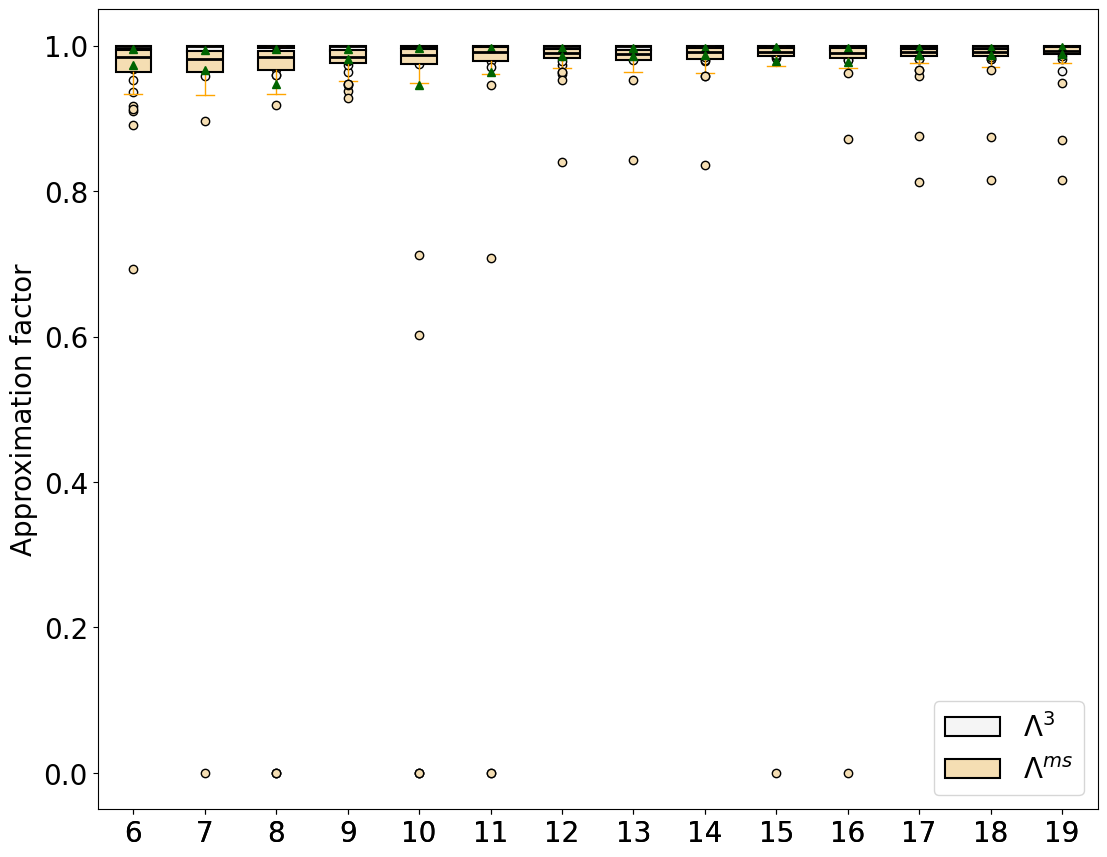

In [58]:
upper_bounds = ["ub1", "ubmp1s"]
algos = ["greedy_max"]
# task_name = "FacebookGraphCoverage"
task_name = "CalTechMaximization"
# task_name = "AdultIncomeFeatureSelection"
# task_name = "YoutubeCoverage"

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

n = 100
start_b = 6
stop_b = 20

sample = 100
suffix = f""

task2title = {
    "FacebookGraphCoverage":"ego-facebook Converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

n_list = []
algo = "modified_greedy" 

ub_list = [
    # "ub1",
    # "ub1m",
    # "ub7",
    "ub7m",
    # "ubmp1p",
    "ubmp1s"
]

ub_title_dict = {
    "ub1": "Upper bound 0",
    "ub1m": "Upper bound 1",
    "ub7": "Upper bound 2",
    "ub7m":"Upper bound 3",
}

budget_list = list(range(start_b, stop_b))
budget_mean_list = []
for bd in budget_list:
    budget_mean_list.append([])

budget_title_list = [f"{bd}" for bd in budget_list]

colors = [
    "darkblue","mediumblue","blue","stateblue"
]
ub_mean_list = []
for ub in ub_list:
    ub_mean_list.append([])

seed_range = range(10, 100)

ubs_to_draw_list = [0, 1]

data_list = []

ub_dirs = {
    "ub1": "../result/archive-6",
    "ub7m": "../result/archive-6",
    "ubmp1p": "../result/archive-6",
    "ubmp1s": "../result/archive-7"
}

for ub_to_draw in ubs_to_draw_list:
    for seed in seed_range:
        ub = ub_list[ub_to_draw]

        root_dir = os.path.join(ub_dirs[ub], path_dict[task_name] + suffix, f"{n}",f"{seed}")
        
        # for i in range(0, len(ub_list)):
        # print(f"a:{algo},up:{ub},d:{root_dir}")
        X, W = load_AF_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
        W_dict = {}
        for i in range(0, len(X)):
            budget = int(X[i])
            W_dict[budget] = W[i]

        for bd in budget_list:
            print(f"seed:{seed}, bd:{bd}")
            budget_mean_list[bd - start_b].append(W_dict[bd])


        print(f"progress:{seed + 1}/{200}")
    data_list.append(budget_mean_list)
    budget_mean_list = []
    for bd in budget_list:
        budget_mean_list.append([])
    

# data = budget_mean_list

fs = 20
plt.rcParams["font.size"] = fs

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Approximation factor")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)
mean_props = {"marker":"^","markerfacecolor":"darkgreen", "markeredgecolor":"darkgreen"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
whisker_props = {"color":"black"}

color_list = ["whitesmoke","wheat"]

whisker_color_list = ["dimgray","orange"]

ub_label_dict = {
    "ub0":r"$\Lambda^3$",
    "ub1":r"$\Lambda^{ms}$",
    "ubmp1s":r"$\Lambda^{ms}$"
}

for i in range(0, len(data_list)):
    data = data_list[i]

    flier_props["markerfacecolor"] = color_list[i]
    whisker_props["color"] = whisker_color_list[i]

    bp = ax.boxplot(data,label=ub_label_dict[f"ub{i}"], patch_artist=True, tick_labels=budget_title_list, showmeans=True, boxprops=box_props, medianprops=median_props
                    , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)

    for median in bp["medians"]:
        median.set_color("black")
    for box in bp["boxes"]:
        box.set_facecolor(color_list[i])

plt.legend()

name_suffix = ""
for ub_idx in ubs_to_draw_list:
    name_suffix += f"_{ub_list[ub_idx]}"

plt.savefig(f'./result_m_upbs/{task_name}{name_suffix}.png', bbox_inches="tight")

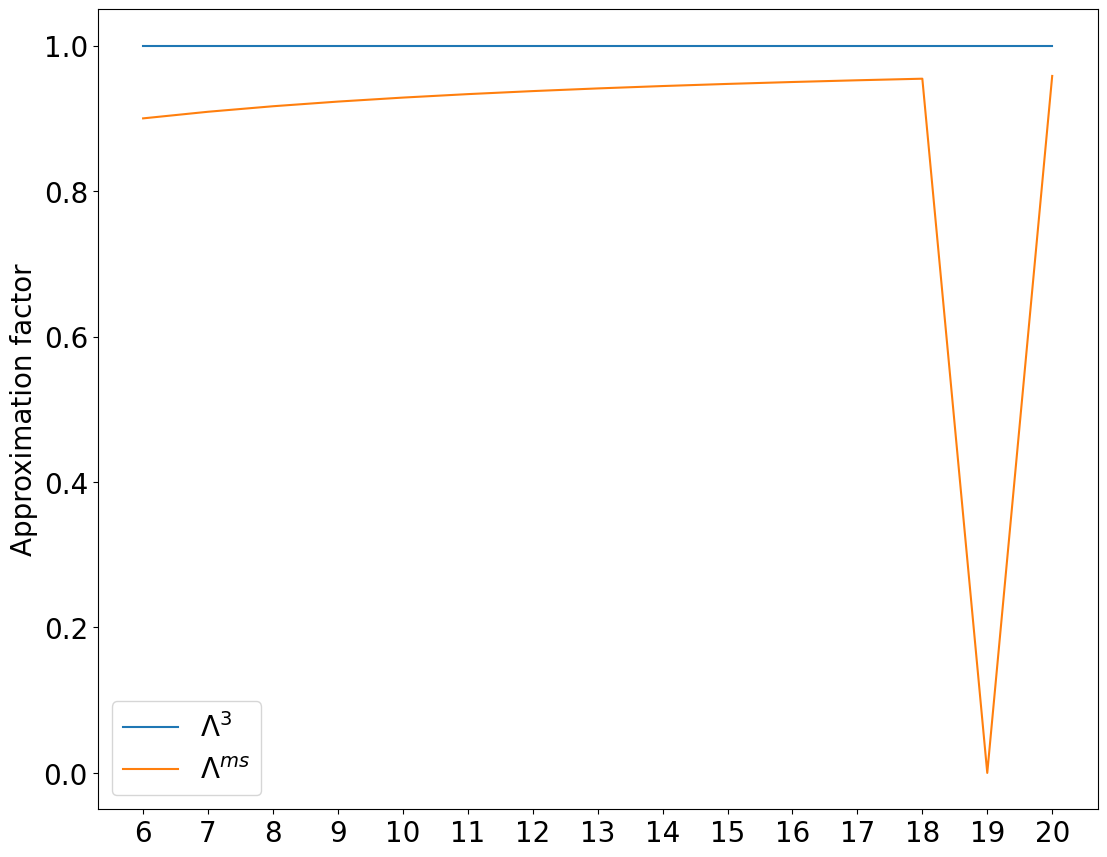

In [42]:
data0 = [
    [1], [1],[1],[1],[1]
    ,[1], [1], [1],  [1]
    ,[1], [1], [1], [1],
    [1],[1],
]
data1 = [
    [0.9], [0.9090909090909091],[0.9166666666666666],[0.9230769230769231],[0.9285714285714286]
    ,[0.9333333333333333], [0.9375], [0.9411764705882353],  [0.9444444444444444]
    ,[0.9473684210526315], [0.95], [0.9523809523809523], [0.9545454545454546],
    [8.901905015925499e-81],[0.9583333333333334],
]
data2 = [
    [0.7827056735026359], [0.8262402267945188],[0.8645555108875268],[0.8821158033795724],[0.9304438926600571]
    ,[0.9378913845], [0.9618983764063502], [0.9676653953487987],  [0.9851275819741546]
    ,[0.9851275819741546], [1], [1], [1],
    [1],[1],
]
data3 = [
    [0.842727209766295], [0.893692475475623],[ 0.9290782128136916],[0.9435421629654527],[0.9717710814827265]
    ,[0.9777916813960061], [0.9879588001734411], [0.9909691001300808],  [0.9969897000433603]
    ,[ 0.9969897000433603], [1], [1], [1],
    [1],[1],
]

budget_list = list(range(6, 21))
budget_title_list = [f"{bd}" for bd in budget_list]

data_list = [data0, data1]

fs = 20
plt.rcParams["font.size"] = fs

fig = plt.figure(figsize=(10, 8))

ax = fig.add_axes([0,0,1,1])
ax.set_ylabel("Approximation factor")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)
mean_props = {"marker":"^","markerfacecolor":"darkgreen", "markeredgecolor":"darkgreen"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
whisker_props = {"color":"black"}

color_list = ["whitesmoke","wheat"]

whisker_color_list = ["dimgray","orange"]

ub_label_dict = [
    r"$\Lambda^3$",
    r"$\Lambda^{ms}$",
    r"$\Lambda^{ms}$"
]

for i in range(0, len(data_list)):
    data = data_list[i]

    flier_props["markerfacecolor"] = color_list[i]
    whisker_props["color"] = whisker_color_list[i]

    # print(f"{len(data)}, {len(budget_title_list)}")
    # bp = ax.boxplot(data,label=ub_label_dict[i], patch_artist=True, tick_labels=budget_title_list, showmeans=True, boxprops=box_props, medianprops=median_props
    #                 , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)
    p = ax.plot(budget_title_list, data, label = ub_label_dict[i])

    for median in bp["medians"]:
        median.set_color("black")
    for box in bp["boxes"]:
        box.set_facecolor(color_list[i])

plt.legend()

name_suffix = ""
for ub_idx in ubs_to_draw_list:
    name_suffix += f"_{ub_list[ub_idx]}"

plt.savefig(f'./result_m_upbs/{task_name}{name_suffix}.png', bbox_inches="tight")

count:1/12 facebook_500.png completed.
count:2/12 facebook_500_T.png completed.
count:3/12 facebook_b.png completed.
count:4/12 facebook_b.png completed.
count:5/12 caltech_100.png completed.
count:6/12 caltech_100_T.png completed.
count:7/12 caltech_b.png completed.
count:8/12 caltech_b.png completed.
count:9/12 adult_100.png completed.
count:10/12 adult_100_T.png completed.
count:11/12 adult_b.png completed.
count:12/12 adult_b.png completed.
count:13/12 youtube_500.png completed.
count:14/12 youtube_500_T.png completed.
count:15/12 youtube_b.png completed.
count:16/12 youtube_b.png completed.


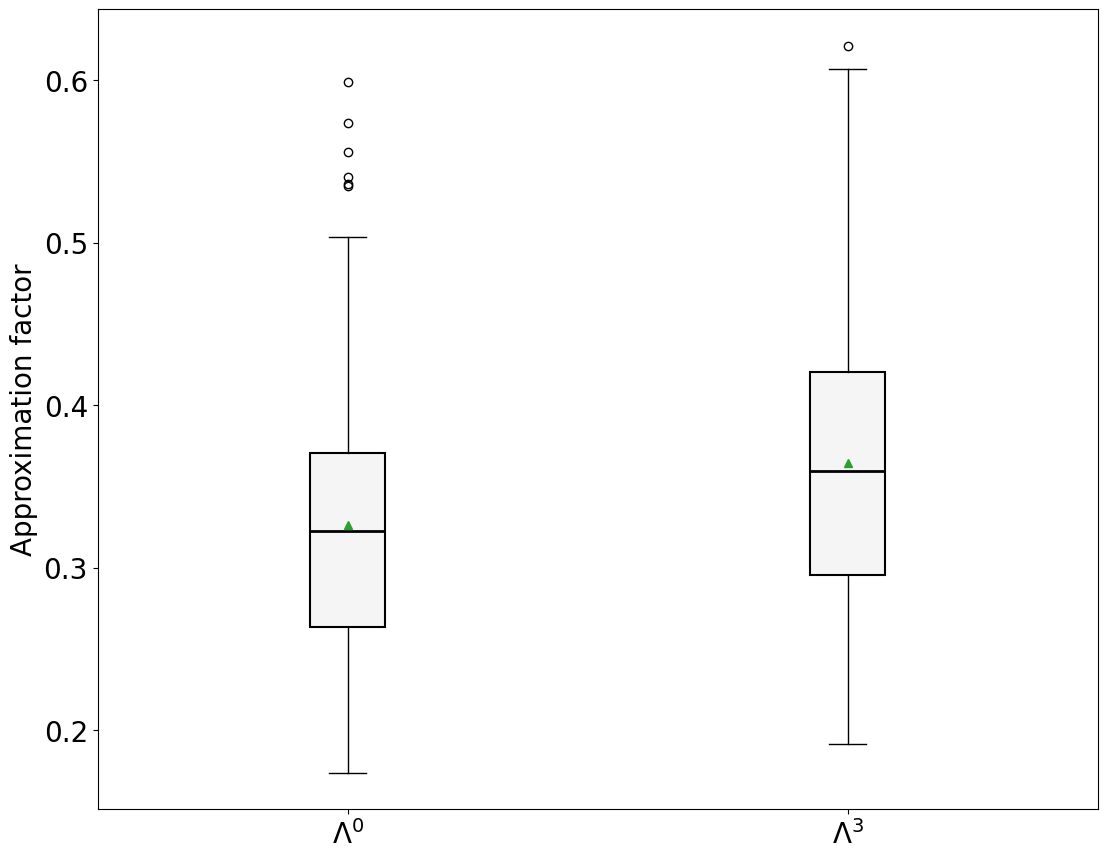

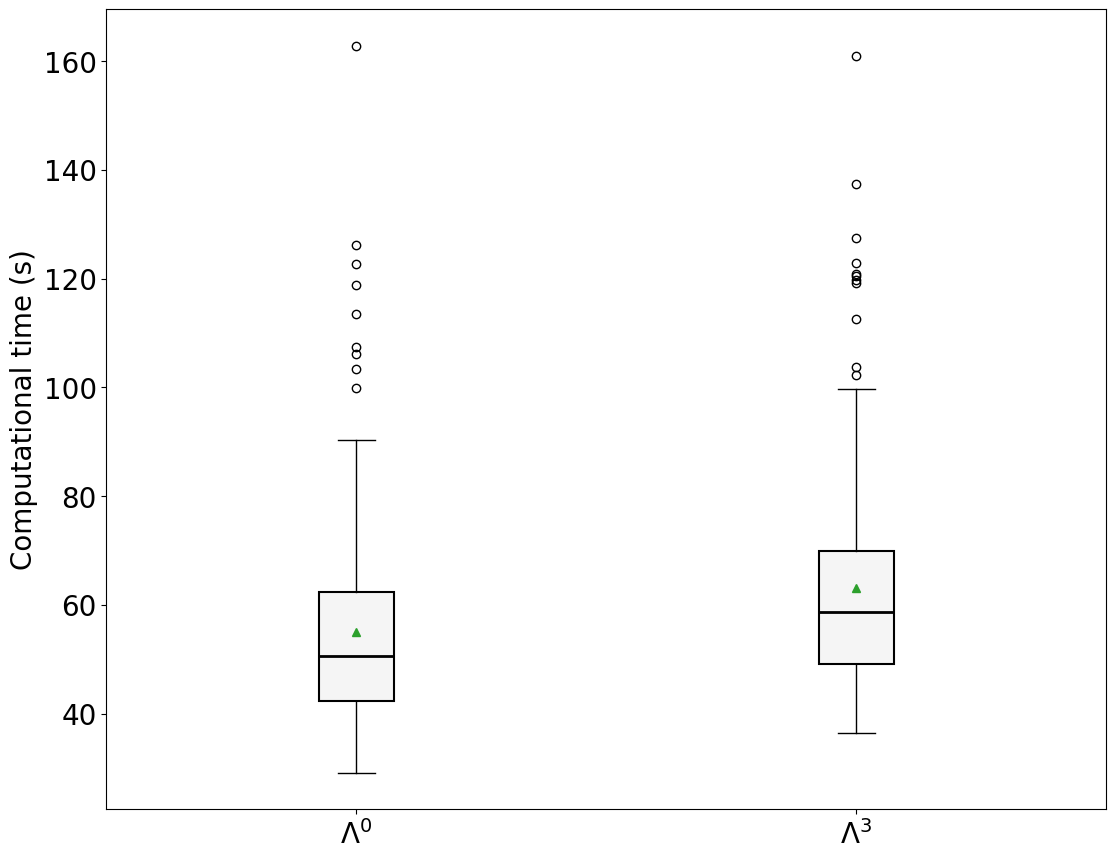

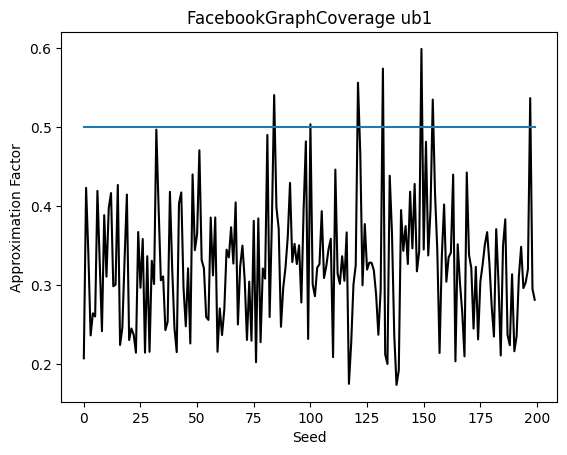

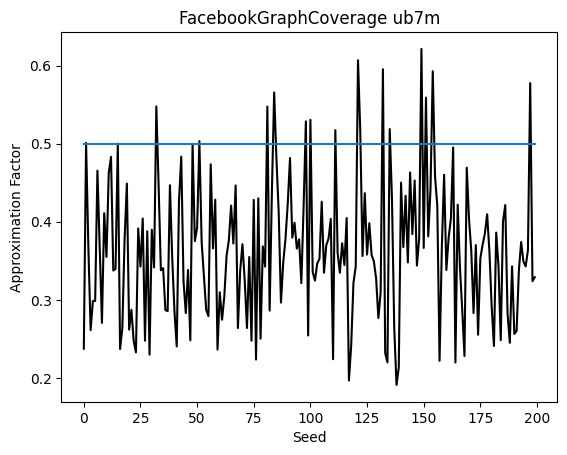

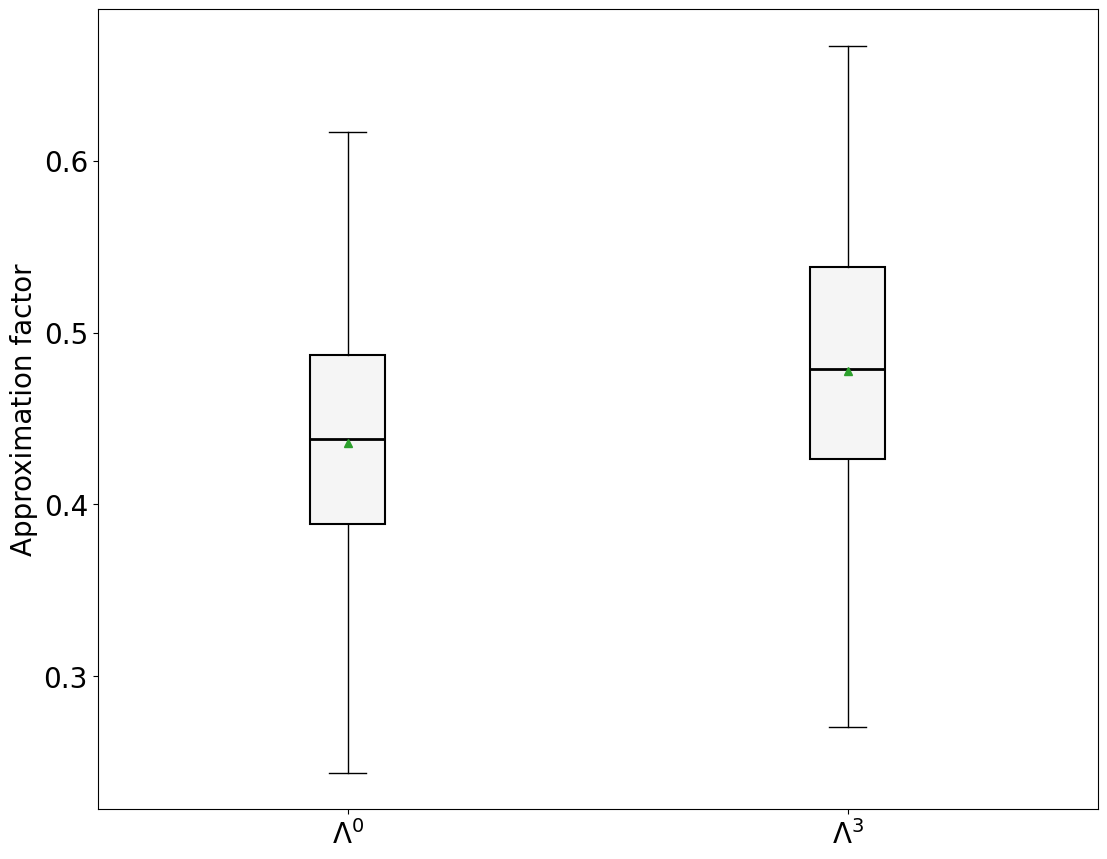

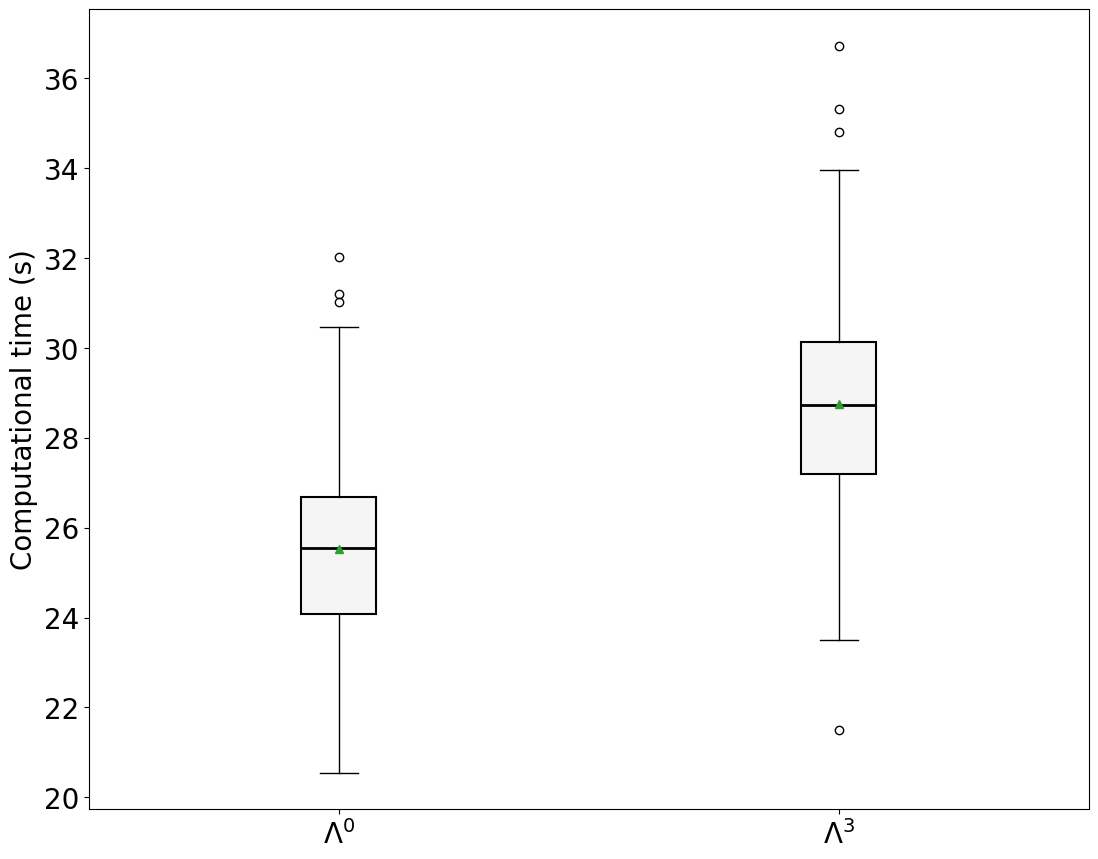

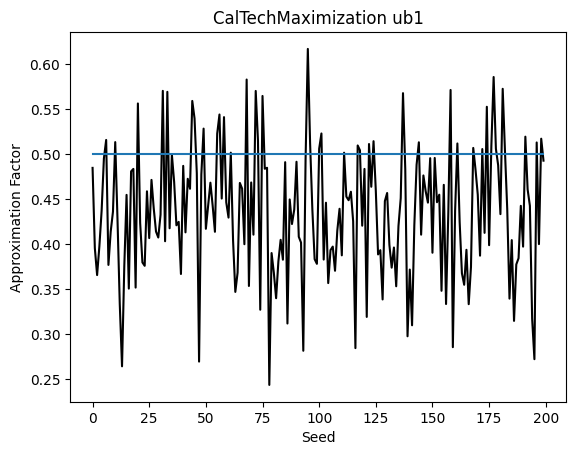

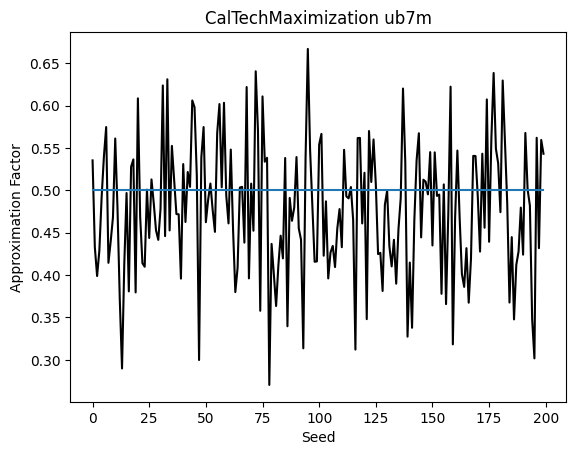

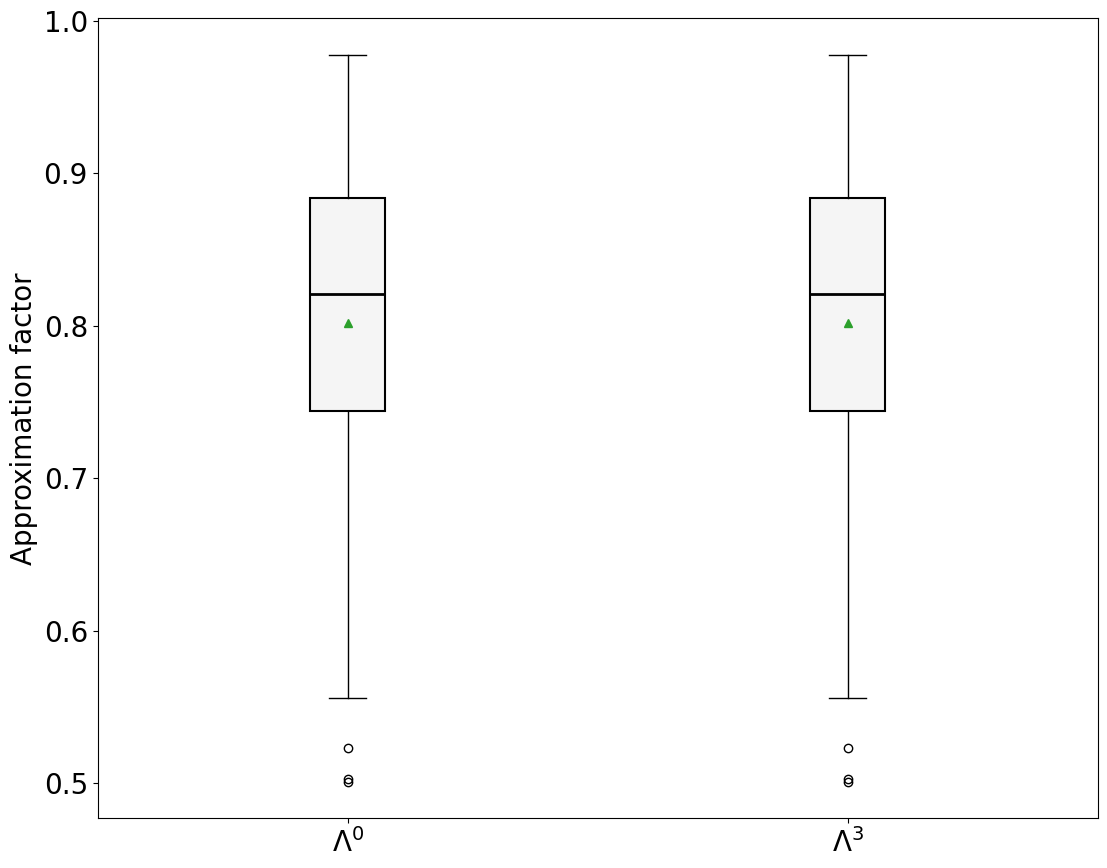

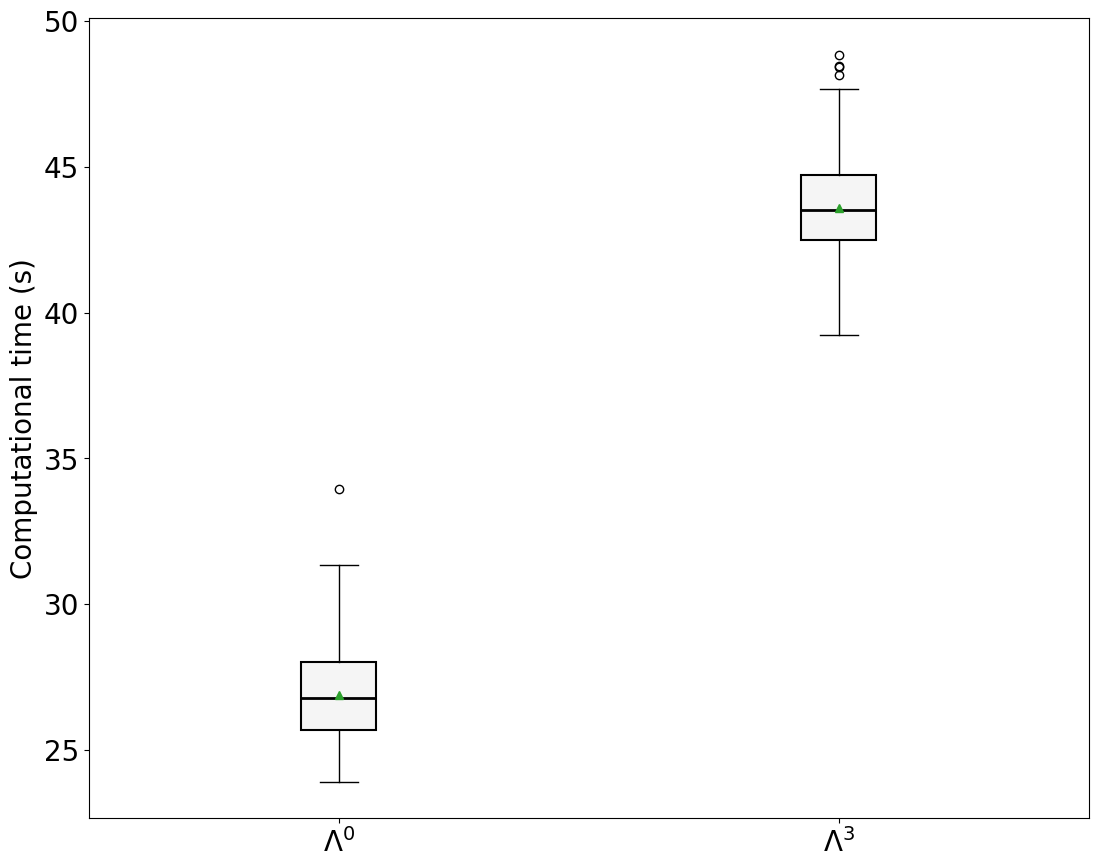

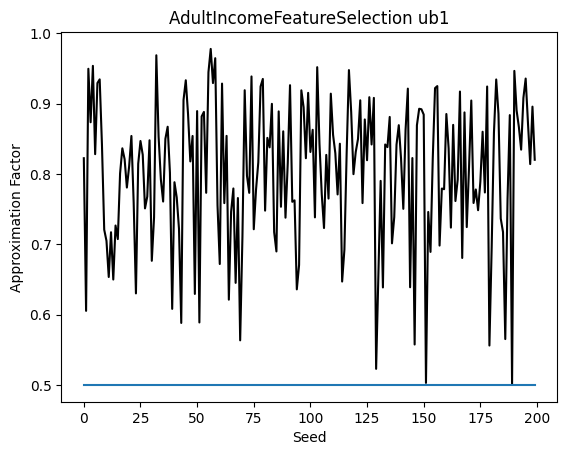

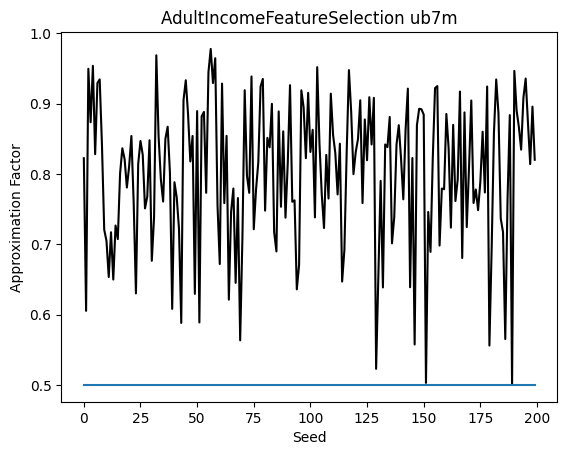

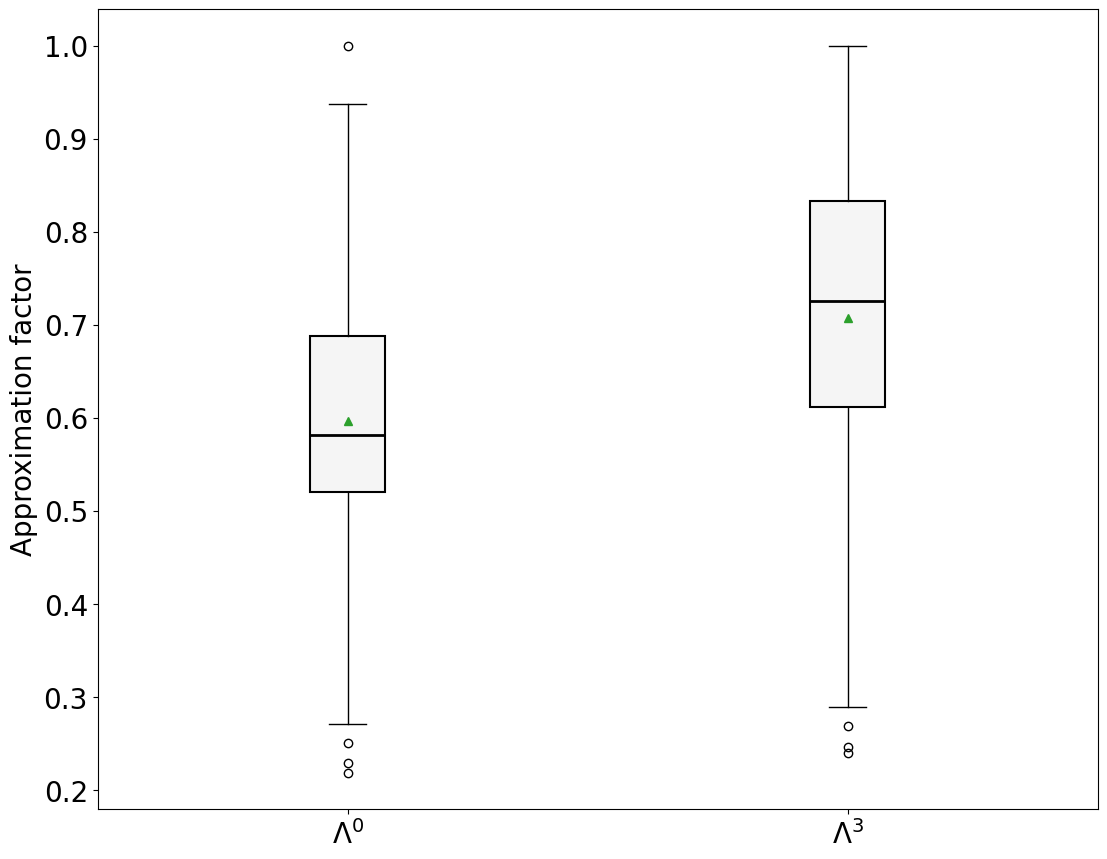

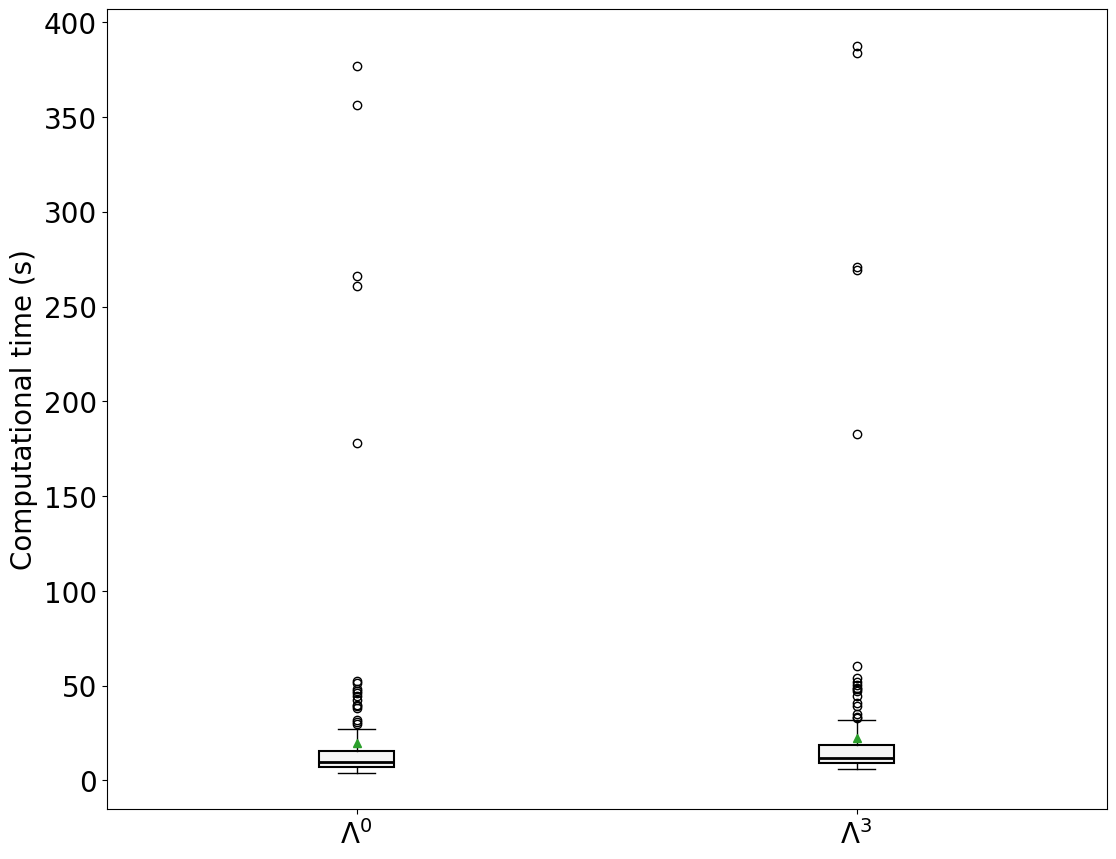

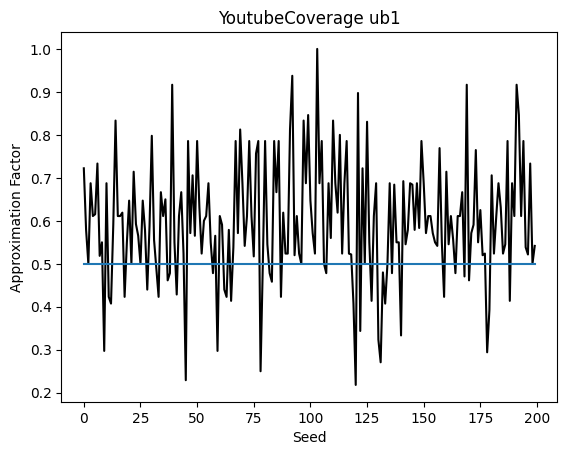

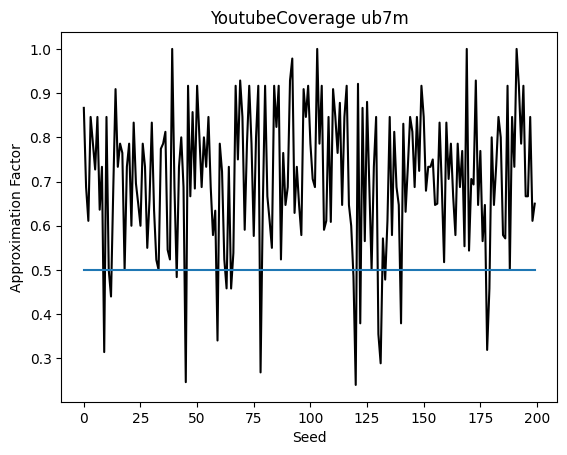

In [23]:
upper_bounds = ["ub1", "ub7m"]
algos = ["modified_greedy"]

tasks = [
    "FacebookGraphCoverage",
    "CalTechMaximization",
    "AdultIncomeFeatureSelection",
    "YoutubeCoverage"
]

shortcut_dict = {
    "FacebookGraphCoverage":"facebook",
    "CalTechMaximization":"caltech",
    "AdultIncomeFeatureSelection":"adult",
    "YoutubeCoverage":"youtube"
}

sizes = [
    "small",
    # "large"
]
sizes_dict = {
    "small":{
        "FacebookGraphCoverage":500,
        "CalTechMaximization":100,
        "AdultIncomeFeatureSelection" : 100,
        "YoutubeCoverage": 500
    },
    "large":{
        "FacebookGraphCoverage":1000,
        "CalTechMaximization":100,
        "AdultIncomeFeatureSelection" : 100,
        "YoutubeCoverage": 1000
    },
}

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

task2title = {
    "FacebookGraphCoverage":"ego-facebook converage",
    "AdultIncomeFeatureSelection" : "income feature selection",
    "CalTechMaximization": "caltech maximization",
    "YoutubeCoverage": "youtube coverage",
}

cal_time = [
    False,
    True
]

output_folder = "./result-ma"
archive_dir = "../result/archive-9"

count = 0

for task_name in tasks:
    for size in sizes:
        for t in cal_time:
            n = sizes_dict[size][task_name]

            sample = 100
            suffix = f""

            n_list = []
            algo = "modified_greedy" 

            ub_list = [
                "ub1",
                # "ub1m",
                # "ub7",
                "ub7m"
            ]
            ub_title_dict = {
                "ub1": r"$\Lambda^0$",
                "ub1m": r"$\Lambda^1$",
                "ub7": r"$\Lambda^2$",
                "ub7m":r"$\Lambda^3$",
            }
            ub_title_list = [ ub_title_dict[ub] for ub in ub_list]
            colors = [
                "darkblue","mediumblue","blue","stateblue"
            ]
            ub_mean_list = []
            for ub in ub_list:
                ub_mean_list.append([])

            seed_range = range(0, 200)

            root_dir = os.path.join(archive_dir, path_dict[task_name] + suffix, f"{n}")

            for i in range(0, len(ub_list)):
                ub = ub_list[i]
                if t:
                    X, Y, Z, W = load_matroid_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir, target='time')
                else:
                    # print(f"t:{ub},t:{task_name},r:{root_dir}")
                    X, Y, Z, W = load_matroid_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
                for idx in range(0, len(X)):
                    b = X[idx]
                    af = W[idx]
                    ub_mean_list[i].append(af)
                
            data = ub_mean_list

            fs = 20
            plt.rcParams["font.size"] = fs

            fig = plt.figure(figsize=(10, 8))

            ax = fig.add_axes([0,0,1,1])
            if t:
                ax.set_ylabel("Computational time (s)")
            else:
                ax.set_ylabel("Approximation factor")

            box_props = dict(linewidth=1.5, color="black")
            median_props = dict(linewidth=2)

            bp = ax.boxplot(data, patch_artist=True, showfliers=True, tick_labels=ub_title_list, showmeans=True, boxprops=box_props, medianprops=median_props)

            for median in bp["medians"]:
                median.set_color("black")

            for box in bp["boxes"]:
                box.set_facecolor("whitesmoke")


            suffix = ""
            if t:
                suffix="_T"


            plt.savefig(os.path.join(output_folder, f"{shortcut_dict[task_name]}_{n}{suffix}.png"), bbox_inches='tight')
            count = count + 1
            print(f"count:{count}/12 {shortcut_dict[task_name]}_{n}{suffix}.png completed.")


        fs = 10
        plt.rcParams["font.size"] = fs

        for i in range(0, len(ub_list)):        
            ub = ub_list[i]
            X, Y, Z, W = load_matroid_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)

            fig, ax = plt.subplots()
            ax.plot(X, W, 'k')
            ax.set_xlabel("Seed")
            ax.set_ylabel("Approximation Factor")
            ax.set_title(f"{task_name} {ub}")

            Baseline = []
            for x in X:
                Baseline.append(0.5)
            
            ax.plot(X, Baseline)

            plt.savefig(os.path.join(output_folder, f"{shortcut_dict[task_name]}_{n}{suffix}_{ub}_p.png"), bbox_inches='tight')
            count = count + 1
            print(f"count:{count}/12 {shortcut_dict[task_name]}_b.png completed.")


    # budget_list = list(range(6, 41))
    # start_b = 6

    # budget_mean_list = []
    # for bd in budget_list:
    #     budget_mean_list.append([])

    # budget_title_list = [f"{bd}" for bd in budget_list]

    # colors = [
    #     "darkblue","mediumblue","blue","stateblue"
    # ]
    # ub_mean_list = []
    # for ub in ub_list:
    #     ub_mean_list.append([])

    # seed_range = range(0, 200)

    # ubs_to_draw_list = [0, 3]

    # data_list = []

    # n = sizes_dict[b_size][task_name]

    # for ub_to_draw in ubs_to_draw_list:
    #     for seed in seed_range:
    #         root_dir = os.path.join(archive_dir, path_dict[task_name], f"{n}",f"{seed}")
    #         ub = ub_list[ub_to_draw]
    #         X, Y, Z, W = load_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir)
    #         W_dict = {}
    #         for i in range(0, len(X)):
    #             budget = int(X[i])
    #             W_dict[budget] = W[i]
    #         for bd in budget_list:
    #             budget_mean_list[bd - start_b].append(W_dict[bd])
    #     data_list.append(budget_mean_list)
    #     budget_mean_list = []
    #     for bd in budget_list:
    #         budget_mean_list.append([])

    # fs = 20
    # plt.rcParams["font.size"] = fs

    # fig = plt.figure(figsize=(10, 8))

    # ax = fig.add_axes([0,0,1,1])
    # ax.set_ylabel("Approximation factor")

    # box_props = dict(linewidth=1.5, color="black")
    # median_props = dict(linewidth=2)
    # mean_props = {"marker":"^","markerfacecolor":"darkgreen", "markeredgecolor":"darkgreen"}
    # flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
    # flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
    # whisker_props = {"color":"black"}

    # color_list = ["whitesmoke","wheat"]

    # whisker_color_list = ["dimgray","orange"]

    # ub_label_dict = {
    #     "ub0":r"$\Lambda^0$",
    #     "ub1":r"$\Lambda^3$"
    # }

    # for i in range(0, len(data_list)):
    #     data = data_list[i]

    #     flier_props["markerfacecolor"] = color_list[i]
    #     whisker_props["color"] = whisker_color_list[i]

    #     bp = ax.boxplot(data,label=ub_label_dict[f"ub{i}"], patch_artist=True, tick_labels=budget_title_list, showmeans=True, boxprops=box_props, medianprops=median_props
    #                     , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)

    #     for median in bp["medians"]:
    #         median.set_color("black")
    #     for box in bp["boxes"]:
    #         box.set_facecolor(color_list[i])

    # plt.legend()


In [17]:
task_name = "FacebookGraphCoverage"
algo = 'modified_greedy'
ub = 'ub7'
archive_dir = '../result/archive-5'
n = 500
path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}


root_dir = os.path.join(archive_dir, path_dict[task_name], f"{n}", f"{0}")

X, W = load_parameter_series(algorithm=algo, upper_bound=ub, task_name=task_name, root_dir=root_dir, parameter='ScanCount')
for w in W:
    print(w)

4
4
5
12
17
17
20
24
24
25
32
34
34
41
48
48
52
58
61
63
72
73
73
73
78
79
87
99
106
108
108
110
114
114
114


In [59]:
result_dir = '../result/archive-5'

tasks_list = ["FacebookGraphCoverage", "YoutubeCoverage", "CalTechMaximization", "AdultIncomeFeatureSelection"]

algo = 'modified_greedy'
ub = 'ub7'

t_mm_list = []

start = 0
stop = 200
count = stop - start

size_dict = {
    "facebook": 1000,
    "youtube": 1000,
    "caltech": 100,
    "adult": 100
}

path_dict = {
    "FacebookGraphCoverage":"facebook",
    "YoutubeCoverage":"youtube",
    "AdultIncomeFeatureSelection":"adult",
    "CalTechMaximization":"caltech",
}

seed_range = range(0, 200)
budget_range = range(6, 40)

for task in tasks_list:
    mm_list = []

    for seed in seed_range:
        task_dir = os.path.join(result_dir, path_dict[task], f"{size_dict[path_dict[task]]}", f"{seed}")
        X1, W1 = load_parameter_series(algorithm=algo, upper_bound='ub1', task_name=task, root_dir=task_dir, parameter='ScanCount')
        X2, W2 = load_parameter_series(algorithm=algo, upper_bound='ub7', task_name=task, root_dir=task_dir, parameter='ScanCount')
        budget_dict_1 = {}
        budget_dict_2 = {}

        for i in range(0, len(X1)):
            budget_dict_1[int(X1[i])] = W1[i]
    

        for i in range(0, len(X2)):
            budget_dict_2[int(X2[i])] = W2[i]

        mm_list = mm_list + [(budget_dict_2[i]/budget_dict_1[i]) for i in budget_range]

    t_mm_list.append(mm_list)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylabel(r"$ratio$")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)
mean_props = {"marker": "^", "markerfacecolor": "darkgreen", "markeredgecolor": "darkgreen"}
flier_props = {"marker": "o", "markerfacecolor": "darkgreen", "markeredgecolor": "black"}
whisker_props = {"color": "black"}

bp = ax.boxplot(t_mm_list, patch_artist=True, tick_labels=[path_dict[task] for task in tasks_list],
                showmeans=True, boxprops=box_props, medianprops=median_props
                , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)

for median in bp["medians"]:
    median.set_color("black")
for box in bp["boxes"]:
    box.set_facecolor("whitesmoke")

plt.savefig(os.path.join("./result_sc", f"tmm2.png"), bbox_inches="tight")
plt.clf()

r:../result/archive-5\facebook\1000\0
r:../result/archive-5\facebook\1000\0
r:../result/archive-5\facebook\1000\1
r:../result/archive-5\facebook\1000\1
r:../result/archive-5\facebook\1000\2
r:../result/archive-5\facebook\1000\2
r:../result/archive-5\facebook\1000\3
r:../result/archive-5\facebook\1000\3
r:../result/archive-5\facebook\1000\4
r:../result/archive-5\facebook\1000\4
r:../result/archive-5\facebook\1000\5
r:../result/archive-5\facebook\1000\5
r:../result/archive-5\facebook\1000\6
r:../result/archive-5\facebook\1000\6
r:../result/archive-5\facebook\1000\7
r:../result/archive-5\facebook\1000\7
r:../result/archive-5\facebook\1000\8
r:../result/archive-5\facebook\1000\8
r:../result/archive-5\facebook\1000\9
r:../result/archive-5\facebook\1000\9
r:../result/archive-5\facebook\1000\10
r:../result/archive-5\facebook\1000\10
r:../result/archive-5\facebook\1000\11
r:../result/archive-5\facebook\1000\11
r:../result/archive-5\facebook\1000\12
r:../result/archive-5\facebook\1000\12
r:../r

<Figure size 1000x800 with 0 Axes>

In [21]:
import os.path
import time

import numpy as np

from facebook_graph_coverage import FacebookGraphCoverage
from feature_selection import AdultIncomeFeatureSelection
from influence_maximization import YoutubeCoverage
from revenue_max import CalTechMaximization

result_dir = os.path.join("./result", "da")

tasks_list = ["facebook", "youtube", "caltech", "adult"]

label_list = {"facebook" : "ego-facebook",
                "youtube": "com-youtube",
                "caltech" : "Caltech36",
                "adult" : "Adult Income"}

cost_mode = "normal"

t_mm_list = []

start = 0
stop = 10
count = stop - start

for task in tasks_list:
    mm_list = []

    for seed in range(start, stop):
        start_time = time.time()

        model = None
        if task == "facebook":
            model = FacebookGraphCoverage(
                budget=0, n=1000, seed=seed, graph_path="./dataset/facebook", knapsack=True, prepare_max_pair=False,
                print_curvature=False, cost_mode=cost_mode, construct_graph=True, graph_suffix="")
        elif task == "youtube":
            model = YoutubeCoverage(0, 1000, "./dataset/com-youtube", seed=seed, knapsack=True, cost_mode=cost_mode,
                            prepare_max_pair=False, print_curvature=False, construct_graph=True)
        elif task == "caltech":
            model = CalTechMaximization(0, 100, "./dataset/caltech", seed=seed, knapsack=True, prepare_max_pair=False,
                                        cost_mode=cost_mode, print_curvature=False, graph_suffix="",
                                        construct_graph=True)
        elif task == "adult":
            model = AdultIncomeFeatureSelection(0, 100, "./dataset/adult-income", seed=seed, sample_count=100,
                                                knapsack=True, construct_graph=True)

        m = model.calculate_m()
        mm_list = mm_list + m

        stop_time = time.time()

        print(f"{task}:{seed+1}/{count}, computational time:{stop_time-start_time}")

    t_mm_list.append(mm_list)

with open("kdkdk.txt", "w") as f:
    for l in t_mm_list:
        f.write(f"{l} ")

fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_ylabel(r"$d_{V \setminus \{e\}}(e)$")

box_props = dict(linewidth=1.5, color="black")
median_props = dict(linewidth=2)
mean_props = {"marker": "^", "markerfacecolor": "darkgreen", "markeredgecolor": "darkgreen"}
flier_props = {"marker": "o", "markerfacecolor": "darkgreen", "markeredgecolor": "black"}
whisker_props = {"color": "black"}


bp = ax.boxplot(t_mm_list, patch_artist=True,
                showmeans=True, boxprops=box_props, medianprops=median_props
                , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)

ax.set_xticks([i+1 for i in range(0, len(tasks_list))])
ax.set_xticklabels(label_list)

for median in bp["medians"]:
    median.set_color("black")
for box in bp["boxes"]:
    box.set_facecolor("whitesmoke")

plt.savefig(os.path.join(result_dir, f"tmm2_{count}.png"), bbox_inches="tight")
plt.clf()

OSError: File *.txt does not exist.

count:1/2 facebook_500.pdf completed.
count:2/2 facebook_v.jpg completed.


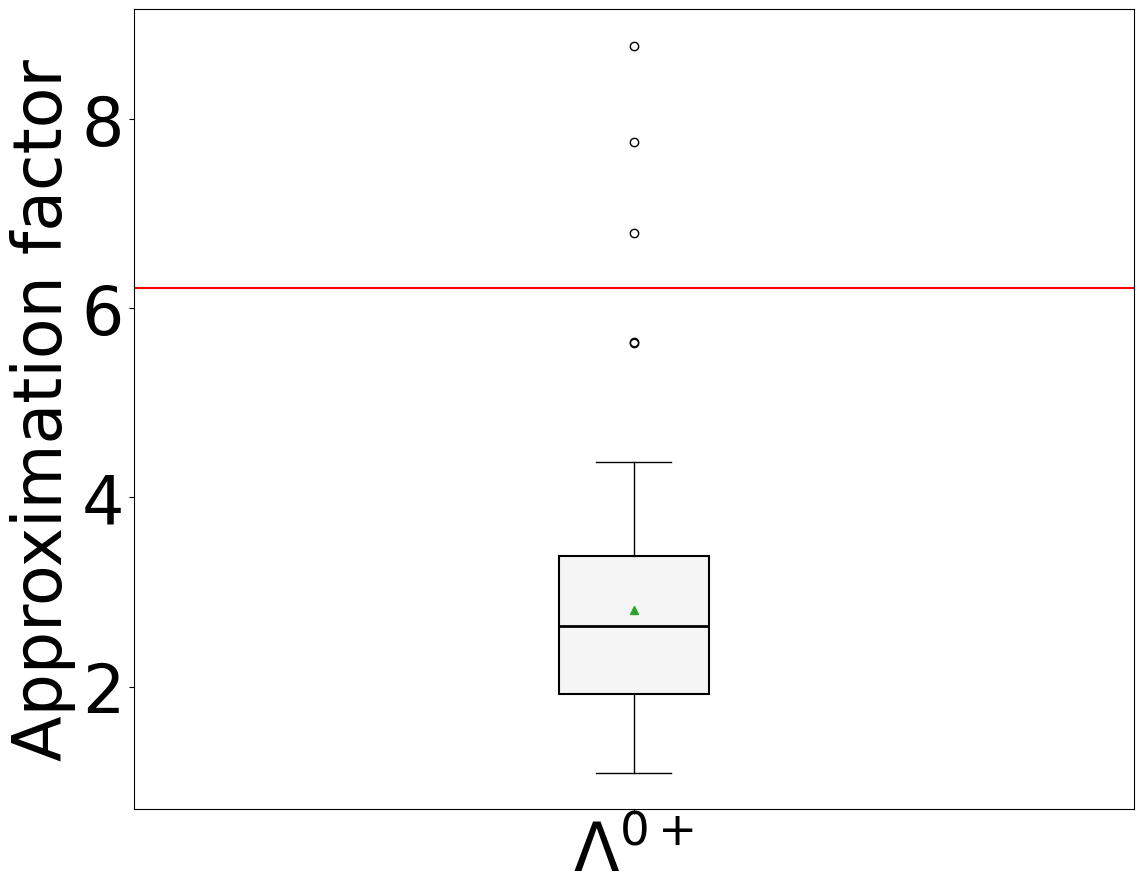

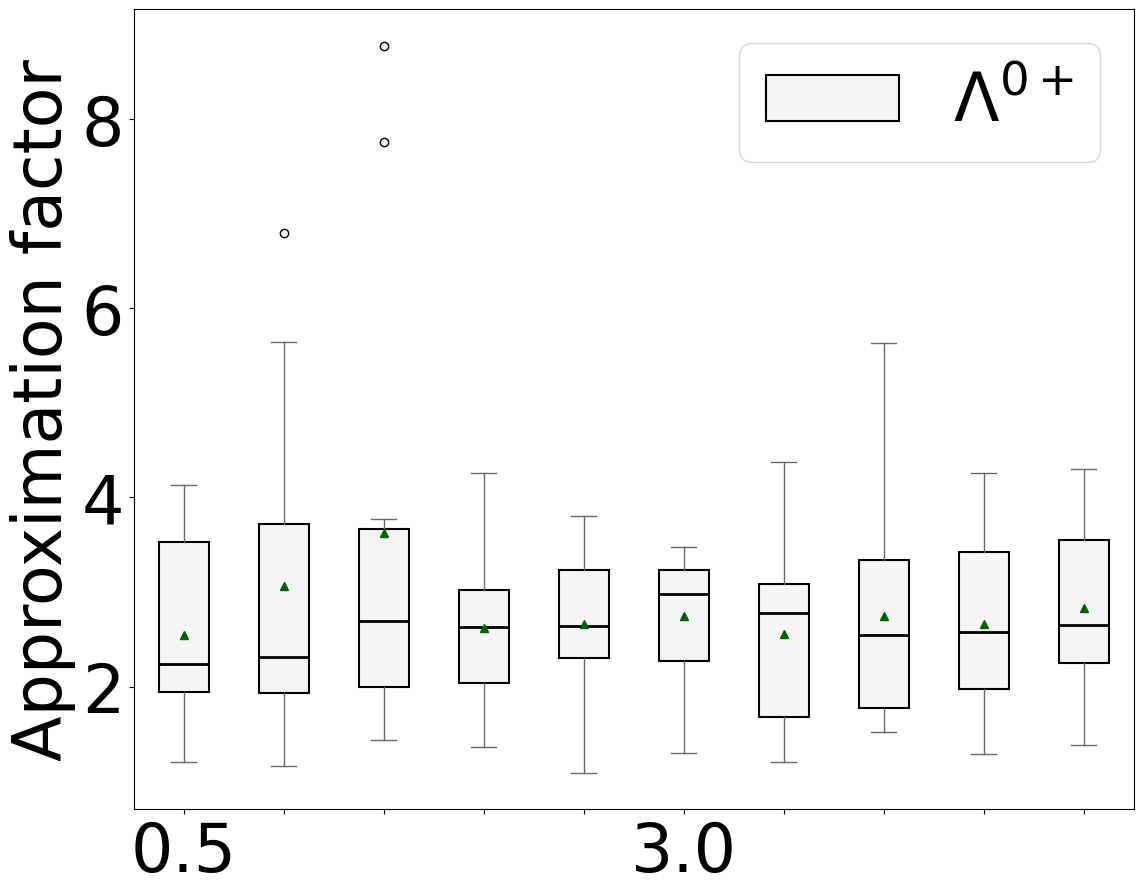

In [ ]:
def load_min_series(upper_bound: str, task_name: str, source_dir: str):
    """
    kv_data has the following keys: 
    - 'S'
    - 'f(S)'
    - 'c(S)'
    - 'Lambda'
    - 'AF'
    """
    task_dict = {
        "facebook": "FacebookGraphCoverage",
        "youtube" : "YoutubeCoverage",
        "caltech": "CalTechMaximization",
        "adult": "AdultIncomeFeatureSelection"
    }

    res = []
    # print(f"r:{source_dir}")
    for name in os.listdir(source_dir):
        # print(f"name:{name}")
        if not os.path.isdir(os.path.join(source_dir, name)):
            up, task, v, seed = name.strip()[:-5].split('-')
            # algo, up, task, b = name.strip()[:-5].split('-')
            # print(f" u:{upper_bound}, t:{task_name}, up:{up}, task:{task}")
            
            if up == upper_bound and task_dict[task_name] == task:
                # print(name)
                file_path = os.path.join(source_dir, name)
                with open(file_path, "rb") as rd:
                    kv_data = pickle.load(rd)
                res.append( (eval(v), kv_data['c(S)'], kv_data['Lambda'], kv_data['AF'], kv_data['Time']) )
    res = sorted(res, key=lambda x: x[0])
    # print(res)
    X, Y, Z, W, T = list(zip(*res))   # change it to two columns
    return X, Y, Z, W, T

task_list = ['facebook']

ub_list = [
    'ub0'
]

ub_title_dict = {
    "ub0":r"$\Lambda^{0+}$",
    "ub2":r"$\Lambda^{2+}$"
}

ub_title_list = [ub_title_dict[ub] for ub in ub_list]

archive_dir = "../result/archive_min"

result_dir = "./result-min"

n = 500
worst_case = math.log(n, math.e)
fs = 48

u_data_list = []
for ub in ub_list:
    u_data_list.append([])

seed_range = range(0, 10)
start_value = 0.5
stop_value = 5.0
interval = 0.5
num_points = int((stop_value - start_value)/interval + 1)
value_range = np.linspace(start=start_value, stop=stop_value, num=num_points)

v_data_list = []
for ub in ub_list:
    temp = []
    for v in value_range:
        temp.append([])
    v_data_list.append(temp)
vti_dict = {}
for i in range(0, len(value_range)):
    v = float(value_range[i])
    vti_dict[v] = i

count = 0
total_count = len(task_list) + len(ub_list) * len(task_list)

for task in task_list:
    for seed in seed_range:
        for ub_idx in range(0, len(ub_list)):
            ub = ub_list[ub_idx]
            source_dir = os.path.join(archive_dir, f"{task}", f"{n}", f"{seed}")
            X, Y, Z, W, T = load_min_series(upper_bound=ub, task_name=task, source_dir=source_dir)

            for x_idx in range(0, len(X)):
                v = X[x_idx]
                v_list_idx = vti_dict[v]
                v_data_list[ub_idx][v_list_idx].append(W[x_idx])    
                u_data_list[ub_idx].append(W[x_idx])

    # first plot
    data = u_data_list

    plt.rcParams["font.size"] = fs
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel("Approximation factor")

    box_props = dict(linewidth=1.5, color="black")
    median_props = dict(linewidth=2)

    bp = ax.boxplot(data, patch_artist=True, showfliers=True, tick_labels=ub_title_list, showmeans=True, boxprops=box_props, medianprops=median_props)
    plt.axhline(y = worst_case, color = 'r', linestyle = '-') 
    
    ax.plot()

    plt.xticks(fontsize=fs) 

    for median in bp["medians"]:
        median.set_color("black")

    for box in bp["boxes"]:
        box.set_facecolor("whitesmoke")


    suffix = ""
    # if t:
    #     suffix="_T"

    plt.savefig(os.path.join(result_dir, f"{task}_{n}{suffix}.jpg"), format='jpg', bbox_inches='tight')
    count = count + 1
    print(f"count:{count}/{total_count} {task}_{n}{suffix}.pdf completed.")

    # second plot

    fig = plt.figure(figsize=(10, 8))

    ax = fig.add_axes([0,0,1,1])
    ax.set_ylabel("Approximation factor")

    box_props = dict(linewidth=1.5, color="black")
    median_props = dict(linewidth=2)
    mean_props = {"marker":"^","markerfacecolor":"darkgreen", "markeredgecolor":"darkgreen"}
    flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
    flier_props = {"marker":"o","markerfacecolor":"darkgreen", "markeredgecolor":"black"}
    whisker_props = {"color":"black"}

    color_list = ["whitesmoke","wheat"]

    whisker_color_list = ["dimgray","orange"]
    for i in range(0, len(ub_list)):
        data = v_data_list[i]
        ub = ub_list[i]

        flier_props["markerfacecolor"] = color_list[i]
        whisker_props["color"] = whisker_color_list[i]

        xtick_labels = []
        for v in value_range:
            if int(v/interval) % 5 == 1:
                xtick_labels.append(v)
            else:
                xtick_labels.append(" ")

        bp = ax.boxplot(data,label=ub_title_dict[ub], patch_artist=True, tick_labels=xtick_labels, showmeans=True, boxprops=box_props, medianprops=median_props
                        , meanprops=mean_props, flierprops=flier_props, whiskerprops=whisker_props, capprops=whisker_props)
        plt.axhline(y = worst_case, color = 'r', linestyle = '-') 

        for median in bp["medians"]:
            median.set_color("black")
        for box in bp["boxes"]:
            box.set_facecolor(color_list[i])

        plt.legend()

        plt.savefig(os.path.join(result_dir, f"{task}_v.pdf"), format='jpg', bbox_inches='tight')
        count = count + 1
        print(f"count:{count}/{total_count} {task}_v.jpg completed.")
    
        